# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [74]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

## Loading the dataset

In [75]:
df = pd.read_csv(r"C:\Users\aweso\Downloads\Loan_Modelling.csv")

## Data Overview

In [76]:
df.shape

(5000, 14)

In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [78]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [79]:
df.isnull().sum().sort_values(ascending=False)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [80]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

**Observations**
  

1. There are 5000 rows and 14 columns in this dataset.


**Sanity checks**

1. There are no null values in a dataset


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [81]:
df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

**Observations**
 - Customers' age is in the range of 23 to 67 years, with a mean of around 45 years.
 - The maximum experience among customers is 43 years, while the mean and median experience are around 20.
 - The average spending on a credit card per month ranges from 1,000 USD to 10,000 USD, with a mean of 1,900 USD and a median of 1,500 USD.
 - Income ranges from 8,000 USD to 224,000 USD while the mean income is 73,000 USD, and the median income is 64,000 USD. The maximum salary of this dataset is 224,000 USD.

## Univariate Analysis

In [82]:
def dist_box(data):
    fig,(ax_box,ax_dis)  = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.45, .95)},figsize=(9, 5))
    sns.boxplot(x=data,showmeans=True, orient='h',color="blue",ax=ax_box)
    ax_box.set(xlabel='')
    sns.histplot(data,kde=False,color='red',ax=ax_dis)


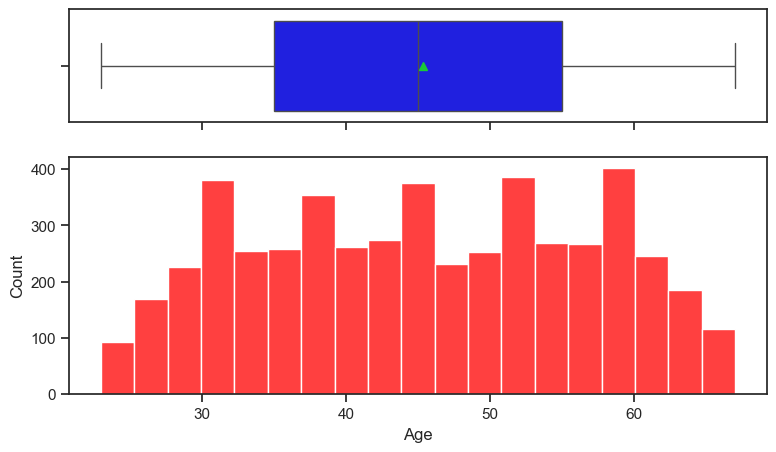

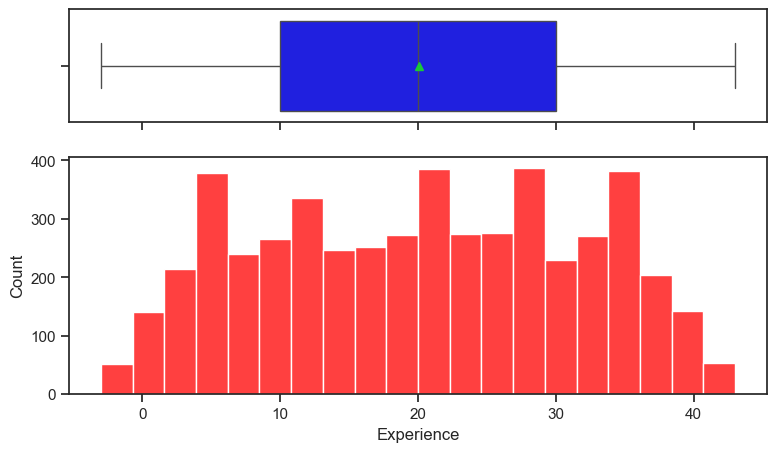

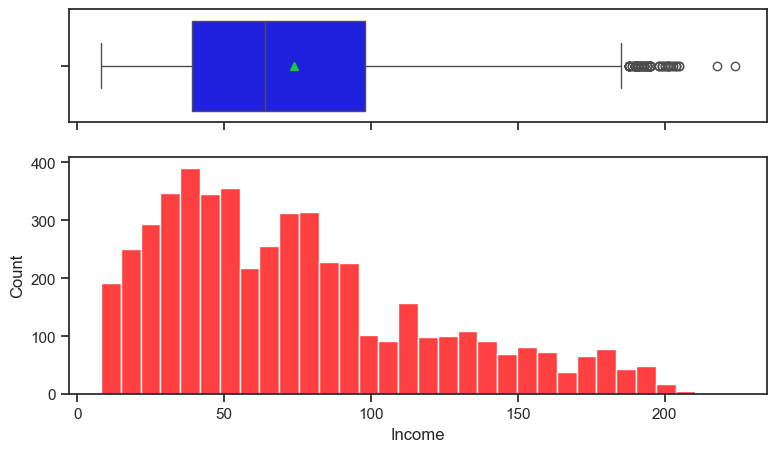

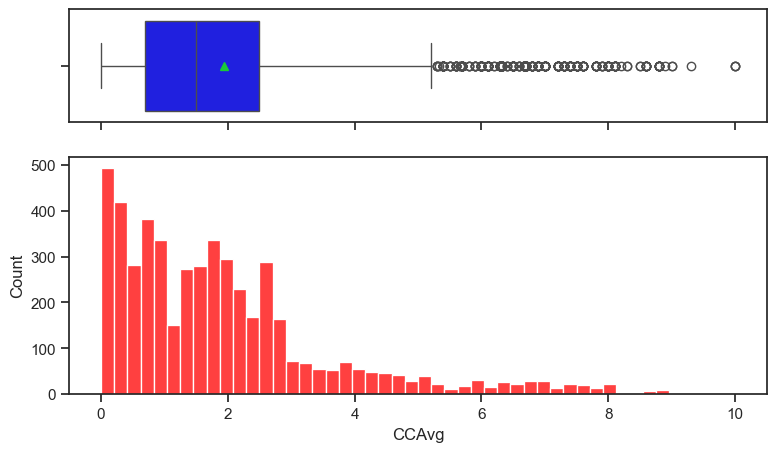

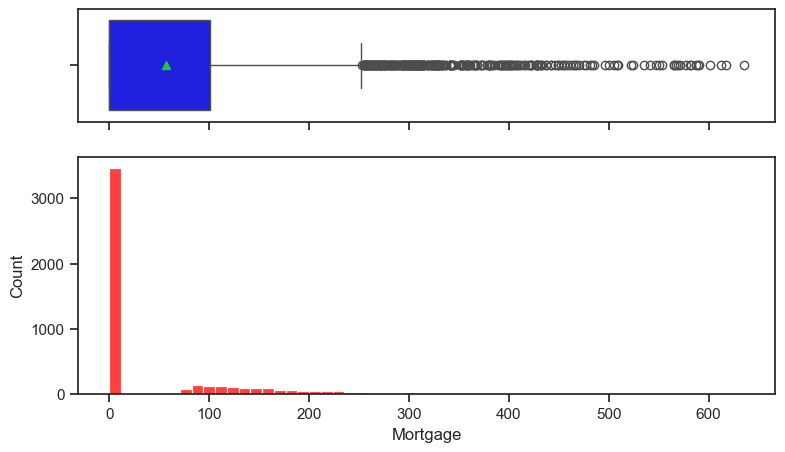

In [83]:
cols=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(cols)):
    dist_box(df[cols[i]])

**Observations**

- Income: The income distribution is right-skewed and there are some outliers on the higher side of the distribution. Extracting these outliers could help normalize the income distribution and decrease the impact of extreme values.

- Average Monthly Credit: The distribution of average monthly credit spending is also right-skewed and there are several outliers on the higher side of the distribution. Extracting these outliers could help normalize the distribution and decrease the impact of extreme values.

- Mortgage: The majority of customers have a mortgage value of 0, which suggests that a significant portion of the customers do not have mortgages. The distribution of mortgage values is right-skewed and similar to income and credit spending, there are outliers on the higher side of the distribution. Extracting these outliers could help normalize the distribution and decrease the impact of extreme values.

In [84]:
df['Agebin'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])
df["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)
df["Spending_group"] = pd.cut( x=df["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

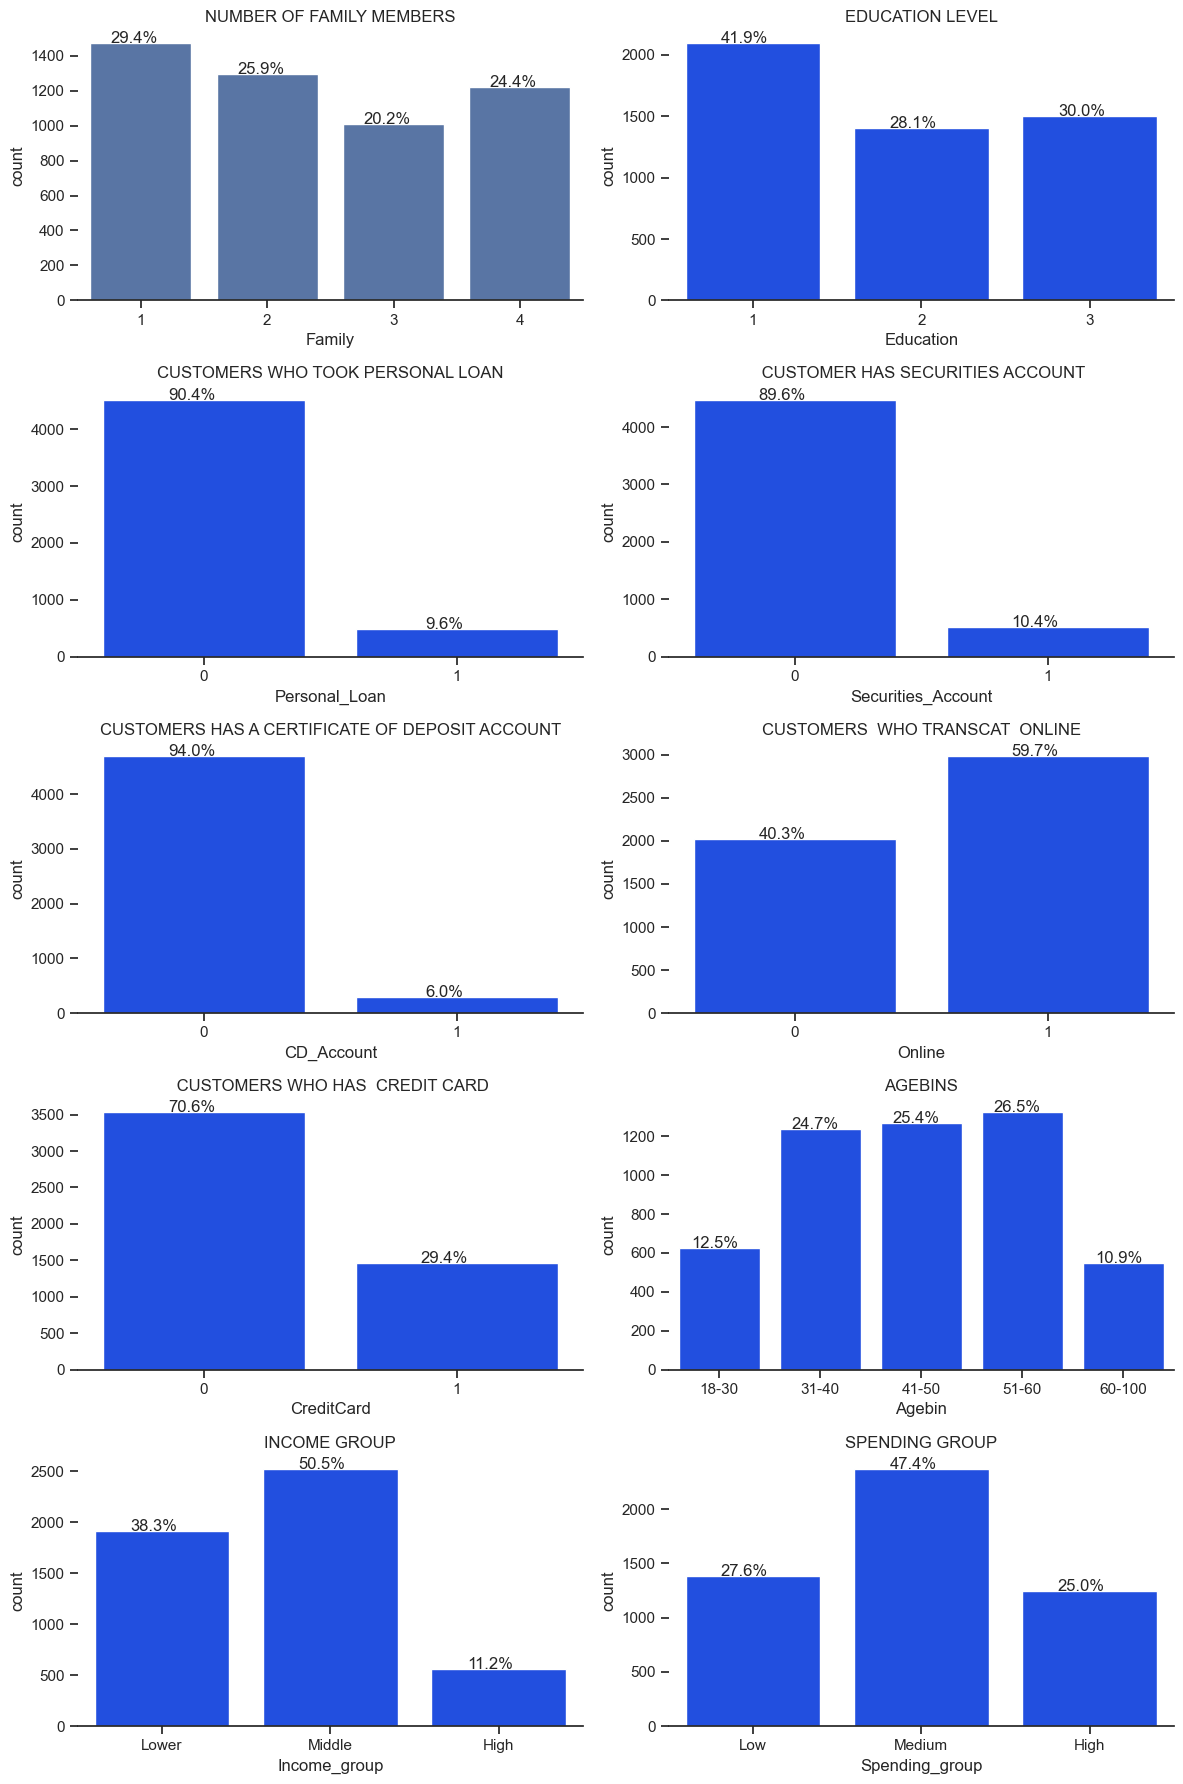

In [85]:
cat_columns = ['Family','Education','Personal_Loan','Securities_Account',
               'CD_Account','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family Members','Education Level','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a Certificate of Deposit Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(12,18))

sns.set_theme(style="ticks")
for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df[variable].value_counts(ascending=False).index
                     sns.set_palette('bright')
                     ax=sns.countplot(x=df[variable], data=df )
                     sns.despine(top=True,right=True,left=True)
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())


**Observations**
 - Marital Status: Approximately 29.4% of the customers are single.

 - Education: Around 41.9% of the customers have an undergraduate level of education.

 - Personal Loan: Approximately 9.6% of the customers have purchased a personal loan from the bank.

 - Securities Account: About 10.4% of the customers have a securities account with the bank.

 - CD Account: Around 6% of the customers have a certificate of deposit (CD) account.

 - Online Transactions: 60% of the customers engage in online transactions.

 - Credit Cards: Approximately 29.4% of the customers have credit cards.

 - Age Group: Around 75% of the customers fall within the age range of 31 to 60, suggesting that the majority of customers are in their middle-aged years.

 - Income Group: Approximately 50% of the bank's customers belong to the middle-income group.

 - Average Spending: About 48% of the customers have a medium level of average spending.

## Bivariate Analysis

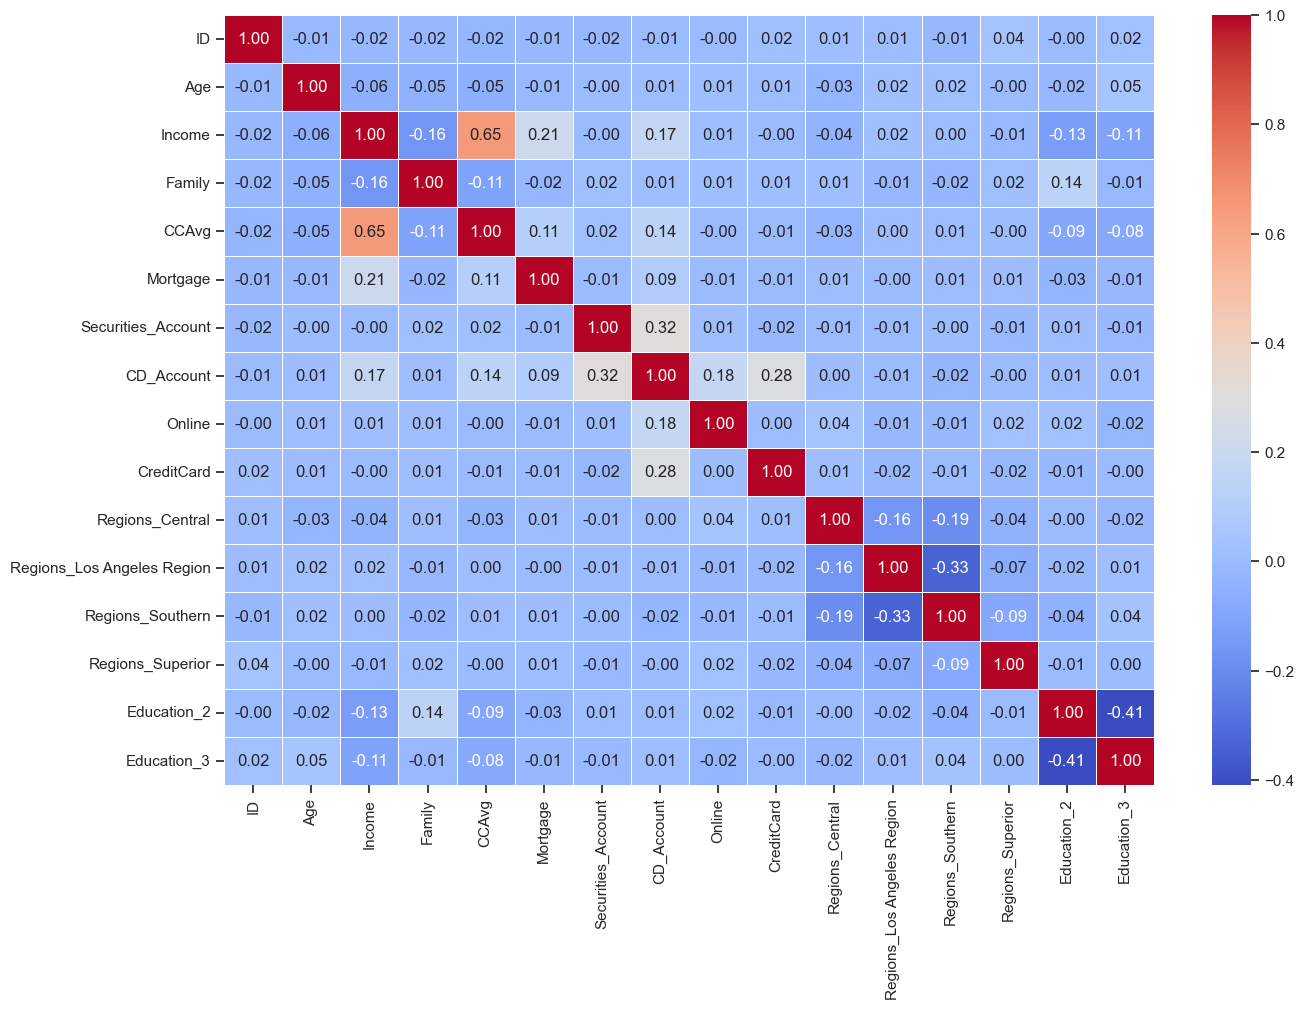

In [167]:
plt.figure(figsize=(15,10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

**Observations**
 - Age and experience are highly correlated

 - Income and average spending on credit cards exhibits a positive correlation. This suggests that customers with higher incomes tend to have higher monthly credit card expenses. The positive correlation implies that as income increases, the average spending on credit cards is also likely to increase.

 - The correlation between mortgage and income is relatively weak, indicating that there is little association between these two variables.

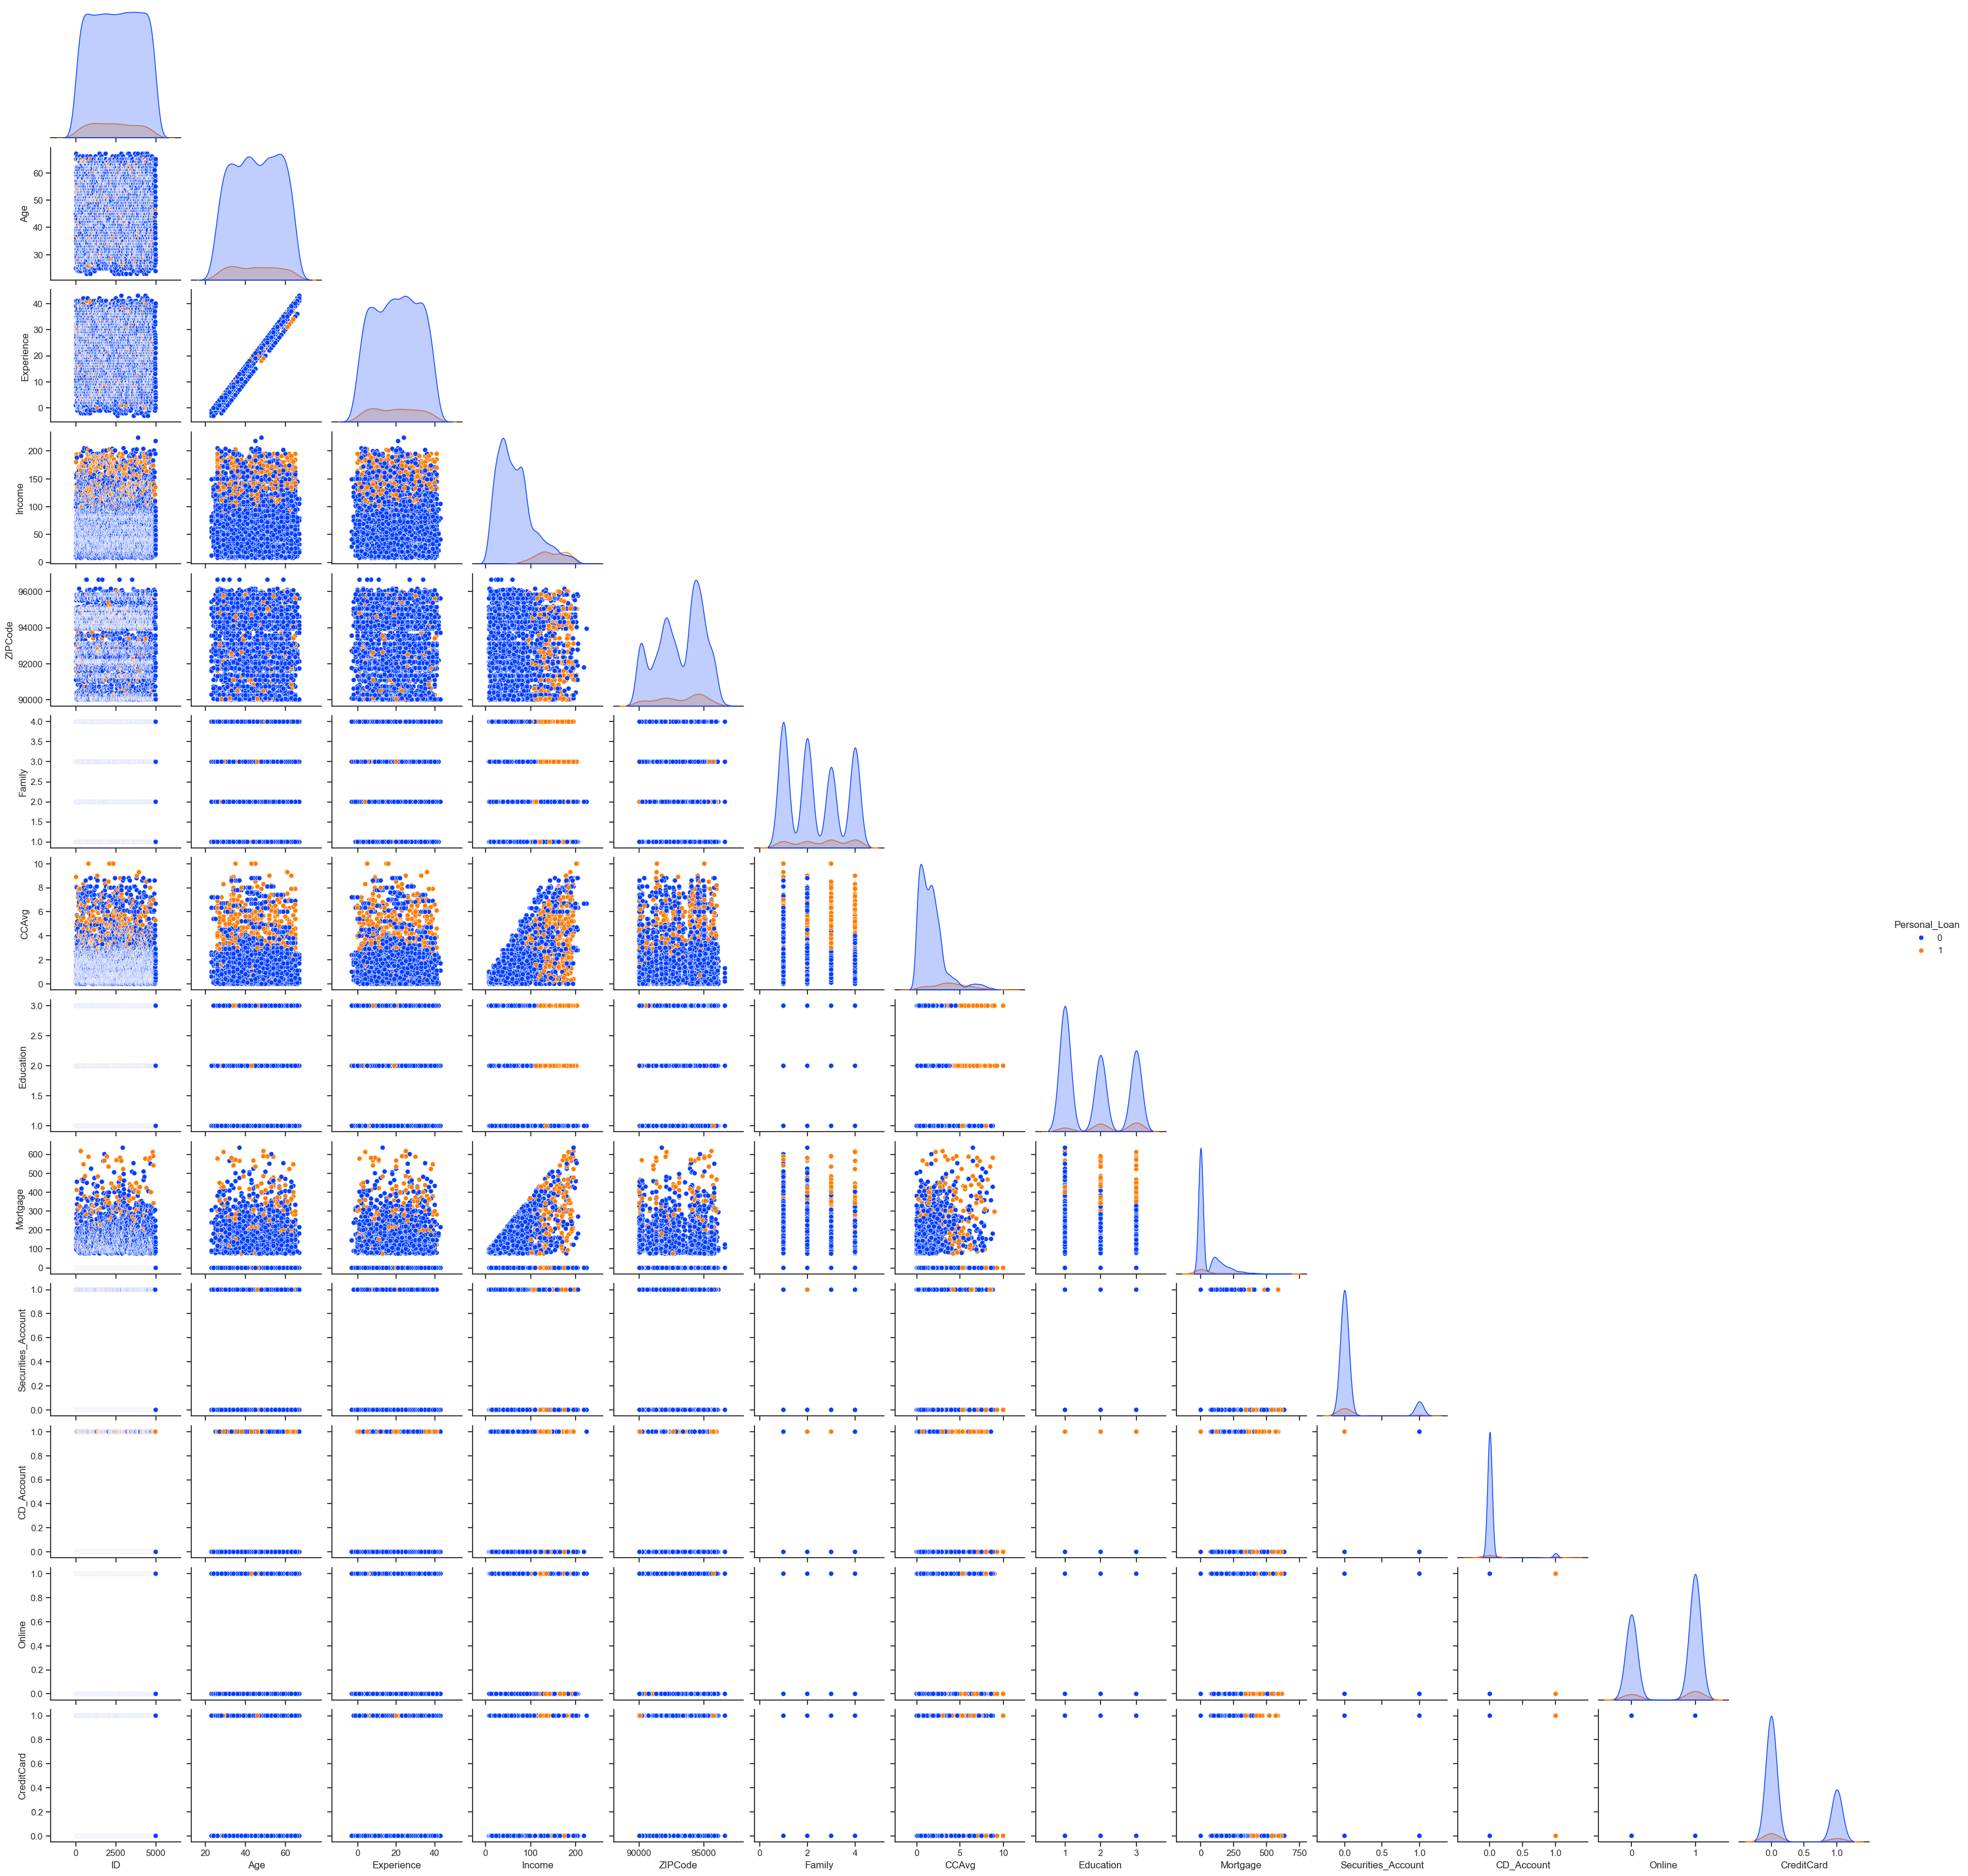

In [87]:
sns.pairplot(df, hue="Personal_Loan",corner=True)
plt.show()

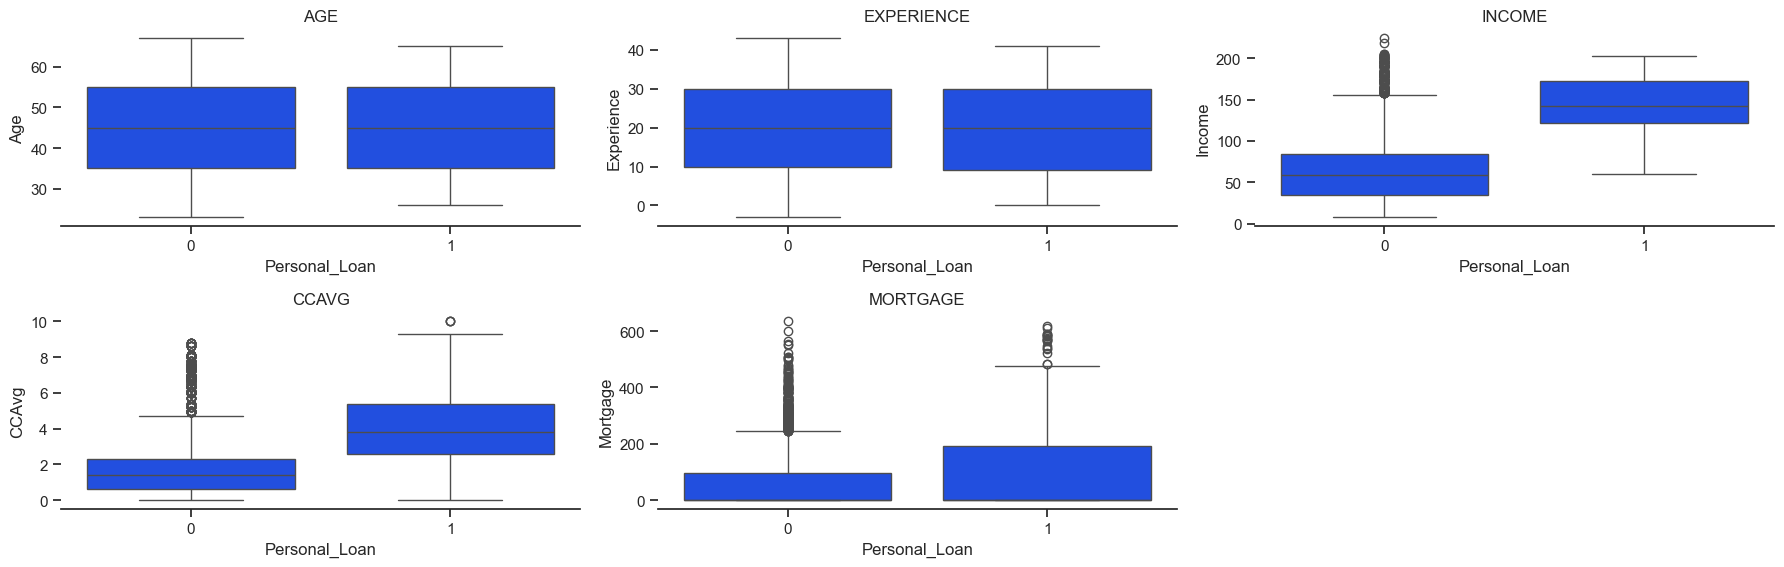

In [88]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(18,28))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        sns.boxplot(x='Personal_Loan',y= df[variable], data=df)
        sns.despine(top=True,right=True,left=True)
        plt.tight_layout()
        plt.title(variable.upper())

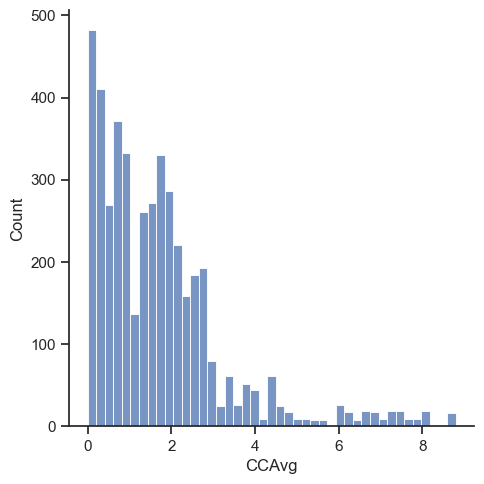

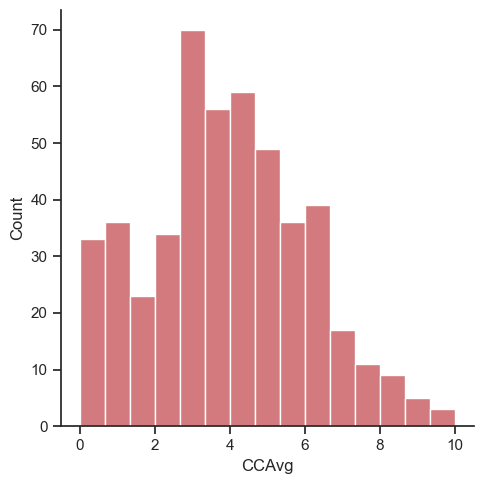

In [89]:
sns.displot( df[df['Personal_Loan'] == 0]['CCAvg'], color = 'b')
sns.displot( df[df['Personal_Loan'] == 1]['CCAvg'], color = 'r')


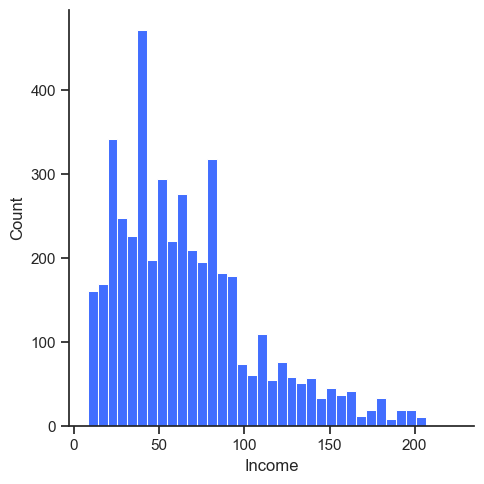

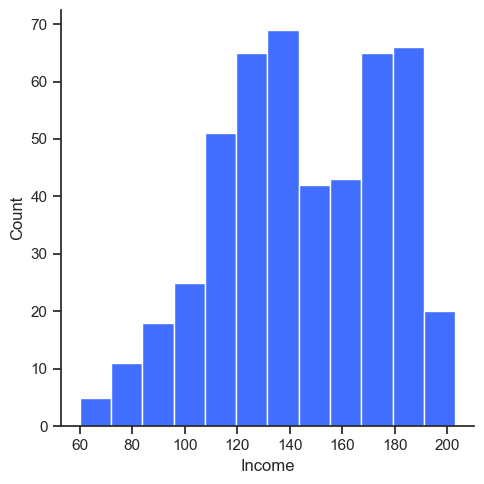

In [40]:
sns.displot( df[df['Personal_Loan'] == 0]['Income'])
sns.displot( df[df['Personal_Loan'] == 1]['Income'])

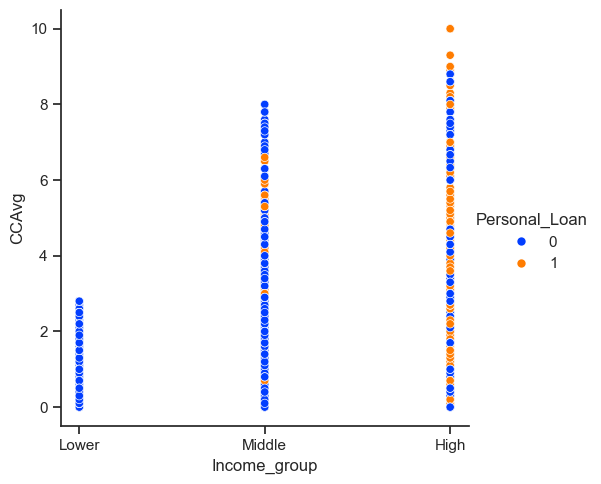

In [91]:
sns.relplot(x='Income_group',y='CCAvg',hue='Personal_Loan',data=df)

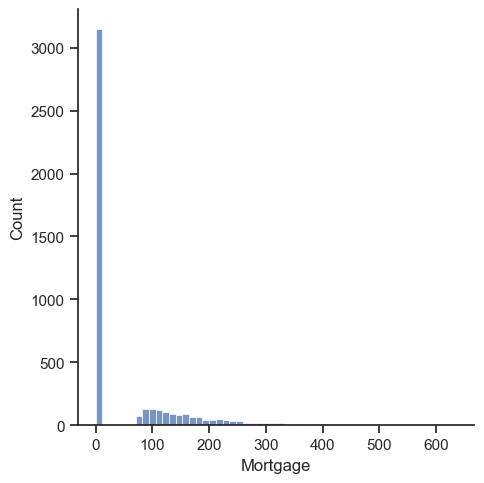

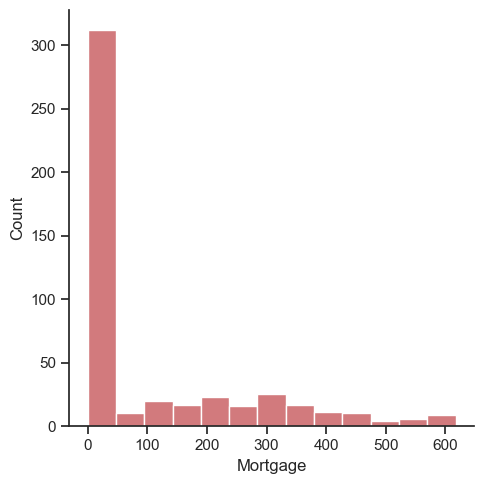

In [92]:
sns.displot( df[df['Personal_Loan'] == 0]['Mortgage'], color = 'b')
sns.displot( df[df['Personal_Loan'] == 1]['Mortgage'], color = 'r')

<Axes: xlabel='Income_group', ylabel='count'>

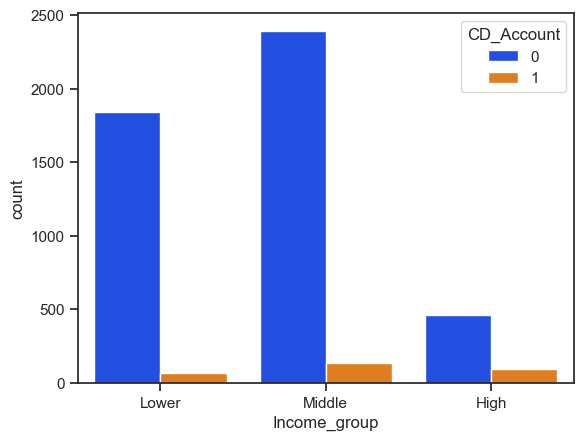

In [93]:
sns.countplot(x='Income_group',hue='CD_Account',data=df)


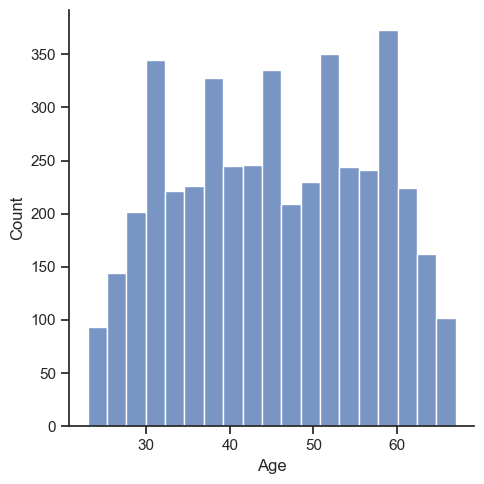

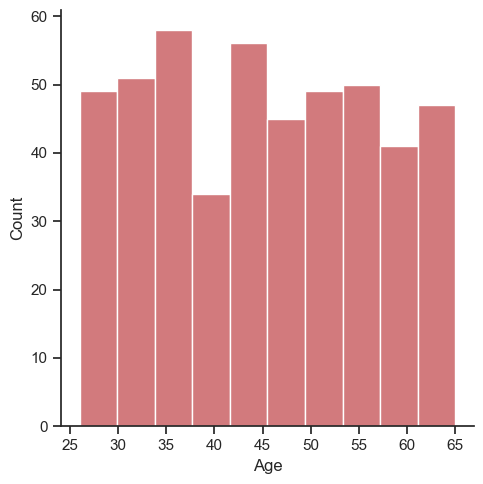

In [95]:
sns.displot( df[df['Personal_Loan'] == 0]['Age'], color = 'b')
sns.displot( df[df['Personal_Loan'] == 1]['Age'], color = 'r')

<Axes: xlabel='Spending_group', ylabel='count'>

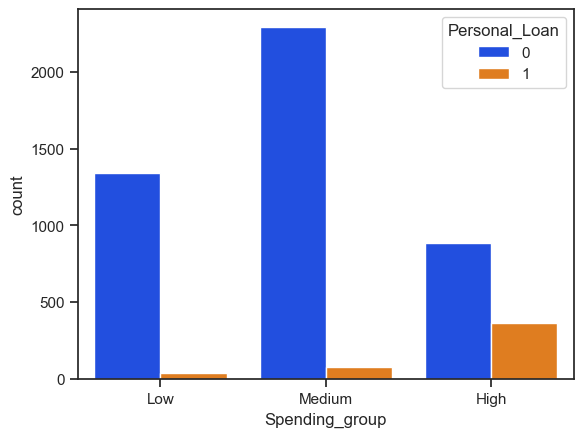

In [96]:
sns.countplot(x='Spending_group',hue='Personal_Loan',data=df)

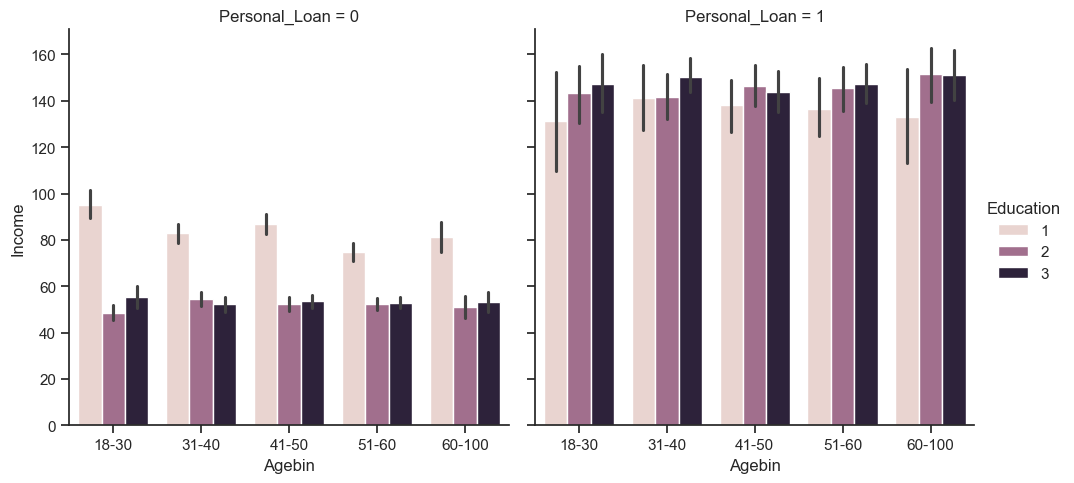

In [97]:
sns.catplot(y='Income',x='Agebin',hue='Education',kind='bar',col="Personal_Loan", data=df)

**Observations**

- The majority of customers who had a personal loan with the bank did not use credit cards from other banks. 

- People with higher incomes tend to opt for personal loans more frequently which suggests that individuals with higher financial resources are more likely to seek loans from the bank.

- Customers with high mortgage amounts are more inclined to opt for a loan which indicates that individuals with larger mortgage obligations may have a greater need for additional financial support through loans.

- Out of those who had a personal loan with the bank, 60% of them also had a securities account. This suggests a positive relationship between having a personal loan and holding a securities account.

- Customers with higher average monthly credit card usage are more likely to have opted for a loan which implies that individuals who regularly utilize their credit cards for higher amounts may also require additional financial assistance through loans.

- The number of customers with a family size of 3 who have borrowed loans from the bank is greater compared to customers with other family sizes. This indicates that customers with a family size of 3 are more likely to take out loans from the bank.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [98]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard Agebin  \
0              0                   1           0       0           0  18-30   
1              0                   1           0       0           0  41-50   
2              0                   0           0       0           0  31-40   
3              0                   0           0       0           0  31-40   
4              0                   0           0       0           1  31-40   

  Income_group Spending_group  
0        Lower         Medium  
1        Lower         Medium  
2        Lower         Medium  
3       Middle           High  
4        Lower         Medium

**Zip Code Treatment**

In [99]:
!pip install zipcodes

In [100]:
import zipcodes as zcode 

In [101]:
zipcode_list=df.ZIPCode.unique()


In [102]:
dict_zip={}
for zipcode in zipcode_list:
    city_county = zcode.matching(zipcode.astype('str'))
    if len(city_county)==1:
        county=city_county[0].get('county')
    else:
        county=zipcode

    dict_zip.update({zipcode:county})

In [103]:
df['County']=df['ZIPCode'].map(dict_zip)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
 14  Agebin              5000 non-null   category
 15  Income_group        5000 non-null   ca

**Convert county to region**

In [105]:
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',
'Ventura County':'Southern',
'San Bernardino County':'Southern',
'Contra Costa County':'Bay Area',
'Santa Cruz County':'Bay Area',
'Riverside County':'Southern',
'Kern County':'Southern',
'Marin County':'Bay Area',
'San Luis Obispo County':'Southern',
'Solano County':'Bay Area',
'Humboldt County':'Superior',
'Sonoma County':'Bay Area',
'Fresno County':'Central',
'Placer County':'Central',
'Butte County':'Superior',
'Shasta County':'Superior',
'El Dorado County':'Central',
'Stanislaus County':'Central',
'San Benito County':'Bay Area',
'San Joaquin County':'Central',
'Mendocino County':'Superior',
'Tuolumne County':'Central',
'Siskiyou County':'Superior',
'Trinity County':'Superior',
'Merced County':'Central',
'Lake County':'Superior',
'Napa County':'Bay Area',
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

In [106]:
df['Regions'] = df['County'].map(counties)

In [107]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard Agebin  \
0              0                   1           0       0           0  18-30   
1              0                   1           0       0           0  41-50   
2              0                   0           0       0           0  31-40   
3              0                   0           0       0           0  31-40   
4              0                   0           0       0           1  31-40   

  Income_group Spending_group                County             Regions  
0        Lower         Medium    Los Angeles County  Los Angeles Region  
1        Lower         Medium    Los Angeles County  Los Angeles Region  
2        Lower         Medium        Alameda County            Bay Area  
3       Middle           High  San Francisco County            Bay Area  
4        Lower         Medium    Los Angeles County  Los Angeles Region

In [108]:
print(df['County'].value_counts())

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

**Fix Data Types**

In [109]:
category_col = ['Personal_Loan', 'Securities_Account','Family', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
df[category_col] = df[category_col].astype('category')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
 14  Agebin              5000 non-null   category
 15  Income_group        5000 non-null   ca

**Fix Experience attribute**

In [111]:
df[df['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

In [112]:
df[df['Experience']<0].sort_values(by='Experience',ascending=True)

ID  Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
4514  4515   24          -3      41   91768      4   1.00         3         0   
2618  2619   23          -3      55   92704      3   2.40         2       145   
4285  4286   23          -3     149   93555      2   7.20         1         0   
3626  3627   24          -3      28   90089      4   1.00         3         0   
2717  2718   23          -2      45   95422      4   0.60         2         0   
2876  2877   24          -2      80   91107      2   1.60         3       238   
3130  3131   23          -2      82   92152      2   1.80         2         0   
2466  2467   24          -2      80   94105      2   1.60         3         0   
3796  3797   24          -2      50   94920      3   2.40         2         0   
2962  2963   23          -2      81   91711      2   1.80         2         0   
793    794   24          -2     150   94720      2   2.00         1         0   
3887  3888   24          -2     118   92634      2   7.20         1         0   
889    890   24          -2      82   91103      2   1.60         3         0   
597    598   24          -2     125   92835      2   7.20         1         0   
315    316   24          -2      51   90630      3   0.30         3         0   
451    452   28          -2      48   94132      2   1.75         3        89   
4116  4117   24          -2     135   90065      2   7.20         1         0   
4481  4482   25          -2      35   95045      4   1.00         3         0   
4411  4412   23          -2      75   90291      2   1.80         2         0   
4015  4016   25          -1     139   93106      2   2.00         1         0   
3157  3158   23          -1      13   94720      4   1.00         1        84   
3279  3280   26          -1      44   94901      1   2.00         2         0   
3284  3285   25          -1     101   95819      4   2.10         3         0   
3292  3293   25          -1      13   95616      4   0.40         1         0   
3394  3395   25          -1     113   90089      4   2.10         3         0   
3425  3426   23          -1      12   91605      4   1.00         1        90   
4088  4089   29          -1      71   94801      2   1.75         3         0   
3824  3825   23          -1      12   95064      4   1.00         1         0   
3946  3947   25          -1      40   93117      3   2.40         2         0   
3076  3077   29          -1      62   92672      2   1.75         3         0   
89      90   25          -1     113   94303      4   2.30         3         0   
2848  2849   24          -1      78   94720      2   1.80         2         0   
226    227   24          -1      39   94085      2   1.70         2         0   
524    525   24          -1      75   93014      4   0.20         1         0   
536    537   25          -1      43   92173      3   2.40         2       176   
540    541   25          -1     109   94010      4   2.30         3       314   
576    577   25          -1      48   92870      3   0.30         3         0   
583    584   24          -1      38   95045      2   1.70         2         0   
649    650   25          -1      82   92677      4   2.10         3         0   
670    671   23          -1      61   92374      4   2.60         1       239   
2980  2981   25          -1      53   94305      3   2.40         2         0   
686    687   24          -1      38   92612      4   0.60         2         0   
1173  1174   24          -1      35   94305      2   1.70         2         0   
1428  1429   25          -1      21   94583      4   0.40         1        90   
1522  1523   25          -1     101   94720      4   2.30         3       256   
1905  1906   25          -1     112   92507      2   2.00         1       241   
2102  2103   25          -1      81   92647      2   1.60         3         0   
2430  2431   23          -1      73   92120      4   2.60         1         0   
2545  2546   25          -1      39   9

In [113]:
df.loc[df['Experience']<0,'Experience']=np.abs(df['Experience'])

In [114]:
df[df['Experience']==0]['Age'].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Age, dtype: float64

**Outliers detection and treatment**

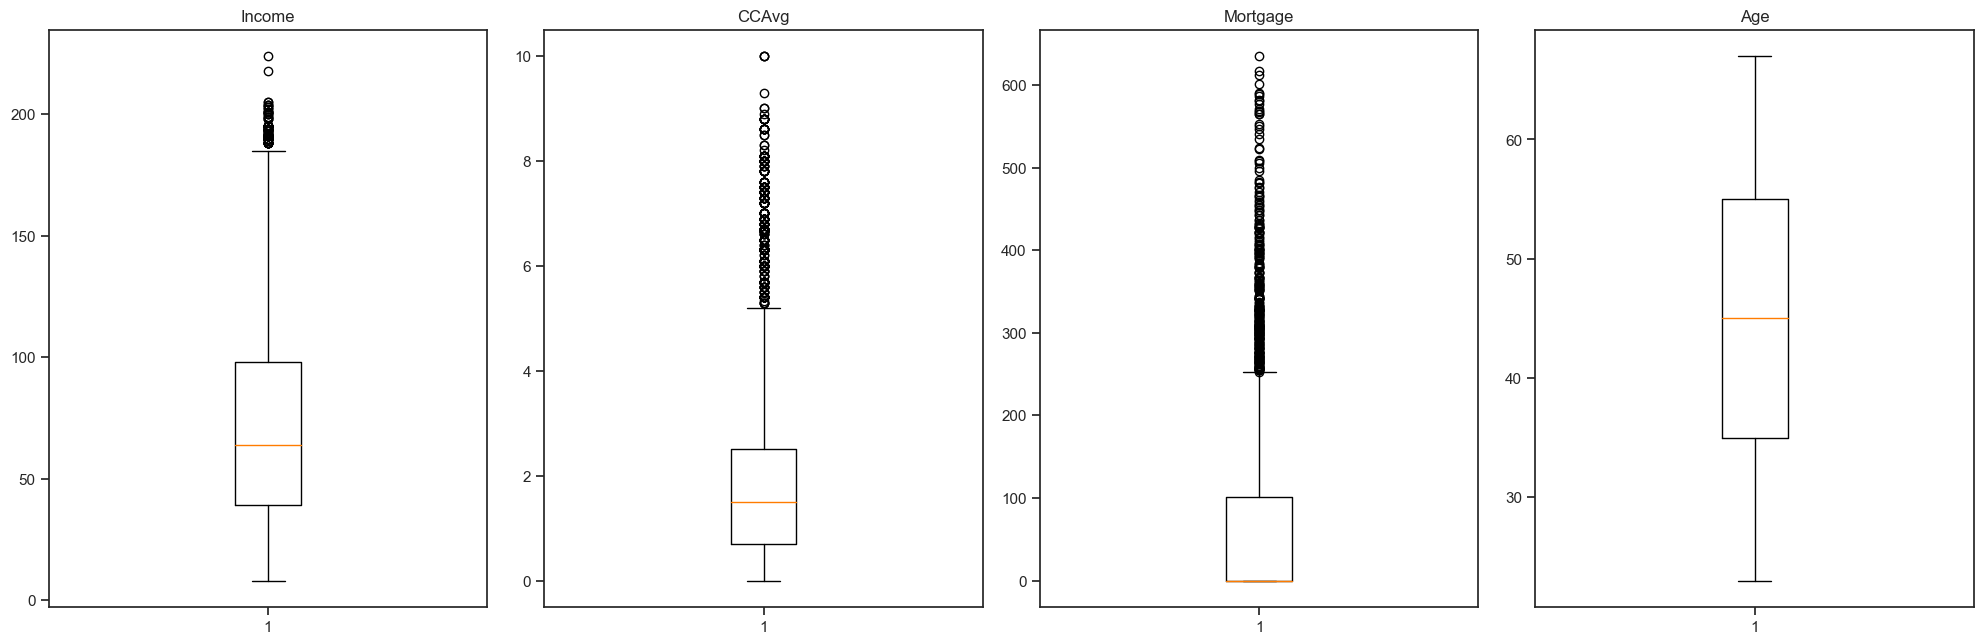

In [115]:
columns =['Income','CCAvg','Mortgage','Age']

plt.figure(figsize=(20,25))

for i, variable in enumerate(columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [116]:
df.sort_values(by=["Income"],ascending = False).head(10)

ID  Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
3896  3897   48          24     224   93940      2   6.67         1         0   
4993  4994   45          21     218   91801      2   6.67         1         0   
526    527   26           2     205   93106      1   6.33         1       271   
2988  2989   46          21     205   95762      2   8.80         1       181   
4225  4226   43          18     204   91902      2   8.80         1         0   
677    678   46          21     204   92780      2   2.80         1         0   
2278  2279   30           4     204   91107      2   4.50         1         0   
3804  3805   47          22     203   95842      2   8.80         1         0   
2101  2102   35           5     203   95032      1  10.00         3         0   
787    788   45          15     202   91380      3  10.00         3         0   

     Personal_Loan Securities_Account CD_Account Online CreditCard Agebin  \
3896             0                  0          1      1          1  41-50   
4993             0                  0          0      1          0  41-50   
526              0                  0          0      0          1  18-30   
2988             0                  1          0      1          0  41-50   
4225             0                  0          0      1          0  41-50   
677              0                  0          0      1          0  41-50   
2278             0                  0          0      1          0  18-30   
3804             0                  0          0      1          0  41-50   
2101             1                  0          0      0          0  31-40   
787              1                  0          0      0          0  41-50   

     Income_group Spending_group                County             Regions  
3896         High           High       Monterey County            Bay Area  
4993         High           High    Los Angeles County  Los Angeles Region  
526          High           High  Santa Barbara County            Southern  
2988         High           High      El Dorado County             Central  
4225         High           High      San Diego County            Southern  
677          High           High         Orange County            Southern  
2278         High           High    Los Angeles County  Los Angeles Region  
3804         High           High     Sacramento County             Central  
2101         High           High    Santa Clara County            Bay Area  
787          High           High    Los Angeles County  Los Angeles Region

**Exclude columns not needed for model training**

In [117]:
df.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  Regions             4973 non-null   object  
dtypes: category(7), float64(1), int64(4), object(1)
memory usage: 269.6+ KB


**Hot Encoding**

In [119]:
HotEn=['Regions','Education']
df=pd.get_dummies(df,columns=HotEn,drop_first=True)

## Model Building

### Model Evaluation Criterion

When predicting whether a customer will take a personal loan or not, two types of predictive errors can occur;

 - Type I Error (False Positive): This occurs when our model predicts that a customer will take a personal loan, but in reality, they do not. This kind of error leads to a loss of resources for the bank, as the bank spent time and money on marketing which was not received in a favorable manner. 

 - Type II Error (False Negative): This happens when our model predicts that a customer will not take a personal loan, but in reality, they do. This error leads to a loss of opportunity, as these customers might have responded positively if they had been targeted with marketing efforts.

In the efforts to predict whether a customer will take a personal loan, my primary focus is on minimizing the occurrences of False Negatives (Type II Error). This error occurs when our model predicts that a customer will not take a personal loan, when in reality, they were likely to do so.

Errors such as Type II Errors as described here represent a significant loss of opportunity for the bank. Not only does this affect the short-term business that the bank is able to engage in, but it also represents a potential loss of a long-term and loyal customer, furthermore becoming a loss of opportunity for the bank.

Therefore, while maintaining the accuracy of the model, our priority is to optimize the model in a way that it significantly reduces the chance of these missed opportunities. This approach will ensure that our marketing efforts are more effectively targeted which can help in both customer acquisition and customer retention. In summarizing, the objective of my model is to maximize the model's Recall in order to increase the chances of correctly identifying potential customers while reducing the occurrences of Type II Errors. 

### Model Building

In [120]:
from sklearn.preprocessing import StandardScaler
target_col = ["Personal_Loan"]
col_names = list(df.columns)
std = StandardScaler()

col_names = list(df.columns)
col_names.remove("Personal_Loan")

scaled = std.fit_transform(df[col_names])
scaled = pd.DataFrame(scaled, columns=col_names)

df = pd.concat([scaled, df[target_col]], axis=1)

df.head()

ID       Age    Income    Family     CCAvg  Mortgage  \
0 -1.731704 -1.774417 -0.538229  1.397414 -0.193385 -0.555524   
1 -1.731012 -0.029524 -0.864109  0.525991 -0.250611 -0.555524   
2 -1.730319 -0.552992 -1.363793 -1.216855 -0.536736 -0.555524   
3 -1.729626 -0.901970  0.569765 -1.216855  0.436091 -0.555524   
4 -1.728933 -0.901970 -0.625130  1.397414 -0.536736 -0.555524   

   Securities_Account  CD_Account    Online  CreditCard  Regions_Central  \
0            2.928915    -0.25354 -1.216618   -0.645314        -0.302825   
1            2.928915    -0.25354 -1.216618   -0.645314        -0.302825   
2           -0.341423    -0.25354 -1.216618   -0.645314        -0.302825   
3           -0.341423    -0.25354 -1.216618   -0.645314        -0.302825   
4           -0.341423    -0.25354 -1.216618    1.549632        -0.302825   

   Regions_Los Angeles Region  Regions_Southern  Regions_Superior  \
0                    1.888441         -0.630729         -0.136912   
1                    1.888441         -0.630729         -0.136912   
2                   -0.529537         -0.630729         -0.136912   
3                   -0.529537         -0.630729         -0.136912   
4                    1.888441         -0.630729         -0.136912   

   Education_2  Education_3 Personal_Loan  
0    -0.624538    -0.654965             0  
1    -0.624538    -0.654965             0  
2    -0.624538    -0.654965             0  
3     1.601185    -0.654965             0  
4     1.601185    -0.654965             0

In [121]:
X = df[col_names]     
y = df[target_col]     

In [122]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
train_y = train_y["Personal_Loan"]
test_y = test_y["Personal_Loan"]

In [123]:
conf_matrix_all = {}

def personal_loan_prediction(name, algo, training_x, testing_x, training_y, testing_y, plot) :
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)
    conf_matrix = confusion_matrix(testing_y, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    conf_matrix_all[name] = conf_matrix
    print("Classification report:")
    print(classification_report(testing_y, predictions))

    model_roc_auc = roc_auc_score(testing_y, predictions)
    fpr,tpr,thresholds = roc_curve(testing_y, probabilities[:,1])

    print ("Area under the curve: ", model_roc_auc)

    if plot:
        fig, axes = plt.subplots(1,2, figsize=(20, 10))
        conf_matrix = np.flip(conf_matrix)

        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_matrix.astype(str), labels)
        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        plt.title('Receiver Operating Characteristic')
        sns.lineplot(x=fpr, y=tpr, ax=axes[1])
        sns.lineplot()
        plt.plot([0, 1], [0, 1],'--')
        axes[1].set_xlim([0, 1])
        axes[1].set_ylim([0, 1])
        axes[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate');
        plt.show();

**Logistic Regression**

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.89      0.68      0.77       157

    accuracy                           0.96      1500
   macro avg       0.93      0.83      0.87      1500
weighted avg       0.96      0.96      0.95      1500

Area under the curve:  0.8327397071865914


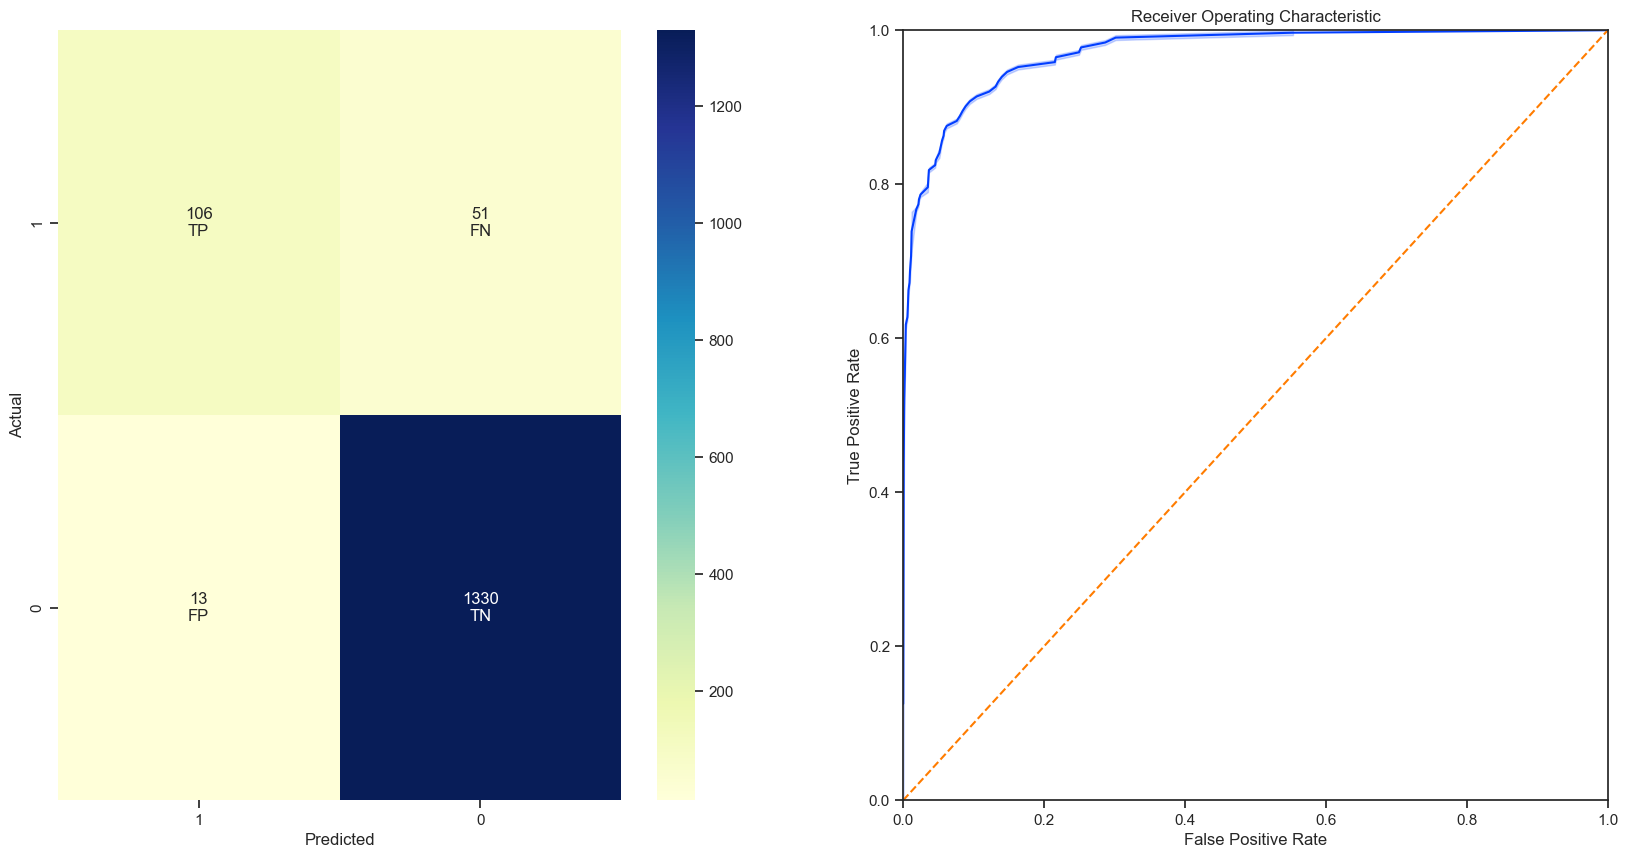

In [124]:
logReg  = LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty="l1", solver='liblinear')

personal_loan_prediction("Logistic Regression", logReg, train_X, test_X, train_y, test_y, plot = True)

In [125]:
logReg.fit(train_X, train_y)
y_test_pred_reg = logReg.predict(test_X)
y_train_pre_reg = logReg.predict(train_X)


In [126]:
result_logReg_test=pd.DataFrame(data=[accuracy_score(test_y, y_test_pred_reg),
                                precision_score(test_y, y_test_pred_reg, average='macro'),
                                recall_score(test_y, y_test_pred_reg, average='macro'),
                                f1_score(test_y, y_test_pred_reg, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Logistic Regression Results - Test dataset'])
result_logReg_test

Logistic Regression Results - Test dataset
Accuracy                                     0.957333
Precision                                    0.926913
Recall                                       0.832740
F1-score                                     0.872311

In [127]:
result_logReg_train=pd.DataFrame(data=[accuracy_score(train_y, y_train_pre_reg),
                                precision_score(train_y, y_train_pre_reg, average='macro'),
                                recall_score(train_y, y_train_pre_reg, average='macro'),
                                f1_score(train_y, y_train_pre_reg, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['LogisticRegression Results - Train dataset'])
result_logReg_train

LogisticRegression Results - Train dataset
Accuracy                                     0.957429
Precision                                    0.913459
Recall                                       0.815240
F1-score                                     0.856099

**Decision Tree original**

In [128]:
X_dt = df.drop('Personal_Loan', axis=1)
y_dt = df['Personal_Loan']

In [129]:
OneHotEn=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=OneHotEn,drop_first=True)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.87      0.89      0.88       157

    accuracy                           0.97      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.97      0.97      0.97      1500

Area under the curve:  0.9348568420353709


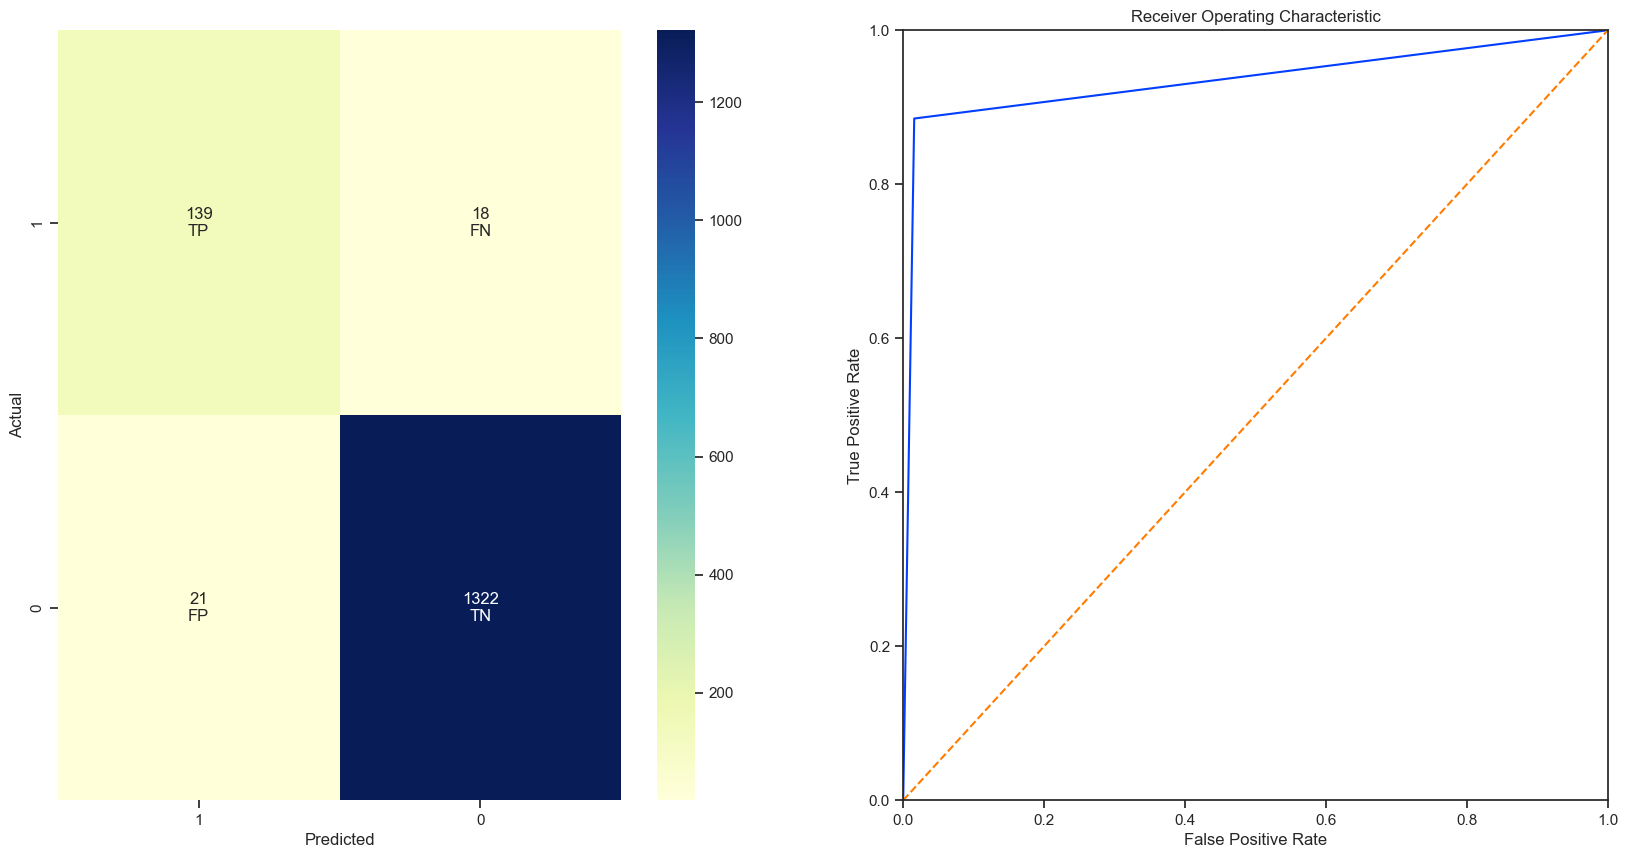

In [130]:
dtree_org = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
dtree_org.fit(train_X, train_y)
personal_loan_prediction("Decision Tree", dtree_org, train_X, test_X, train_y, test_y, plot=True)

y_pred_dtree_org = dtree_org.predict(test_X)

In [131]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior', 'Education_2', 'Education_3']


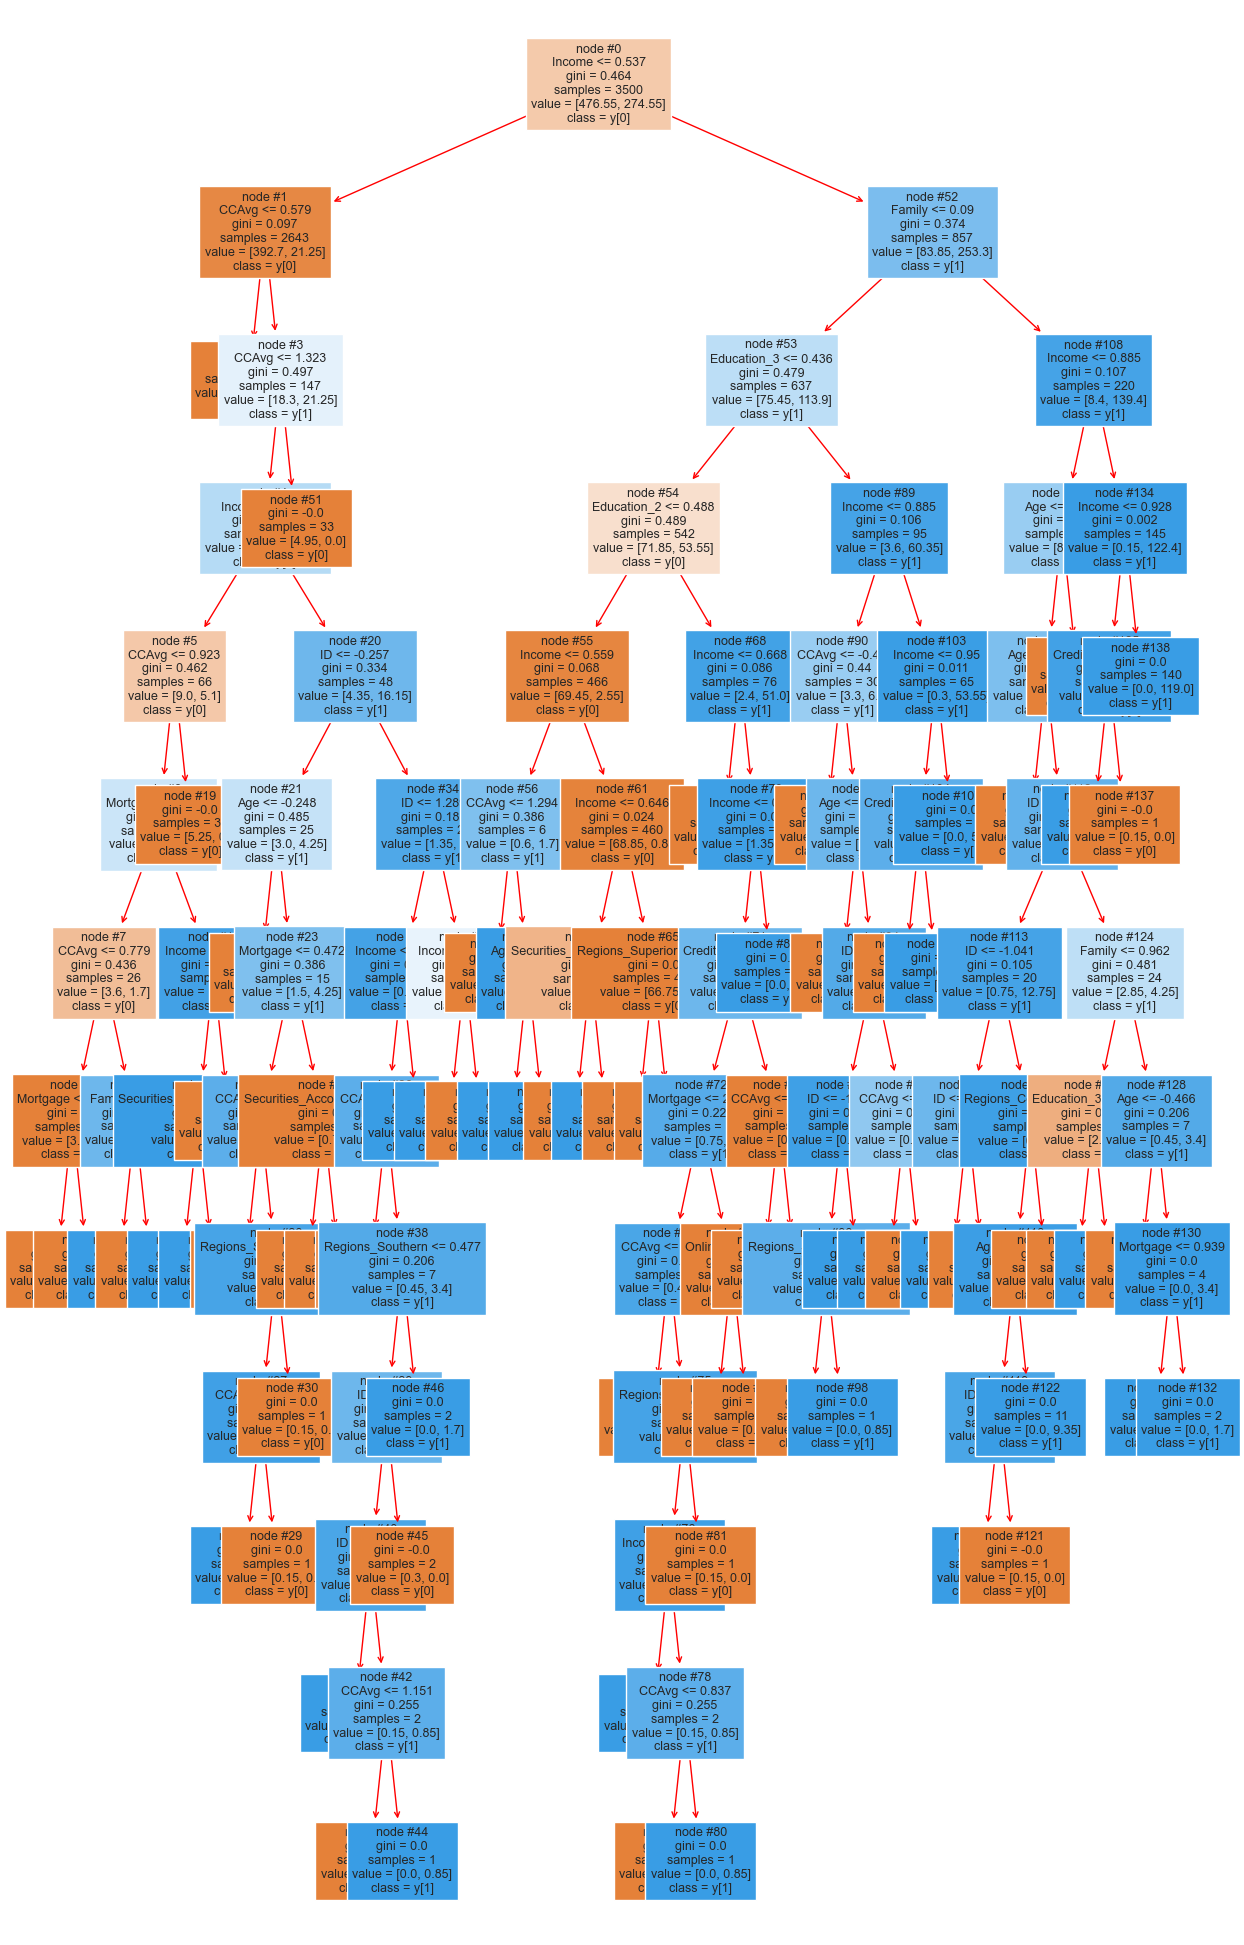

In [133]:
plt.figure(figsize=(15,25))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(dtree_org,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(1)
plt.show()

In [134]:
dtree_org.fit(train_X, train_y)
y_test_pred_dtree_org = dtree_org.predict(test_X)
y_train_pred_dtree_org = dtree_org.predict(train_X)


In [135]:
result_dtree_org_test=pd.DataFrame(data=[accuracy_score(test_y, y_test_pred_dtree_org),
                                precision_score(test_y, y_test_pred_dtree_org, average='macro'),
                                recall_score(test_y, y_test_pred_dtree_org, average='macro'),
                                f1_score(test_y, y_test_pred_dtree_org, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Decision tree Orginal Results - Test dataset'])
result_dtree_org_test

Decision tree Orginal Results - Test dataset
Accuracy                                       0.974000
Precision                                      0.927659
Recall                                         0.934857
F1-score                                       0.931218

In [136]:
result_dtree_org=pd.DataFrame(data=[accuracy_score(train_y, y_train_pred_dtree_org),
                                precision_score(train_y, y_train_pred_dtree_org, average='macro'),
                                recall_score(train_y, y_train_pred_dtree_org, average='macro'),
                                f1_score(train_y, y_train_pred_dtree_org, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Decison Tree Original Results - Train dataset'])
result_dtree_org

Decison Tree Original Results - Train dataset
Accuracy                                             1.0
Precision                                            1.0
Recall                                               1.0
F1-score                                             1.0

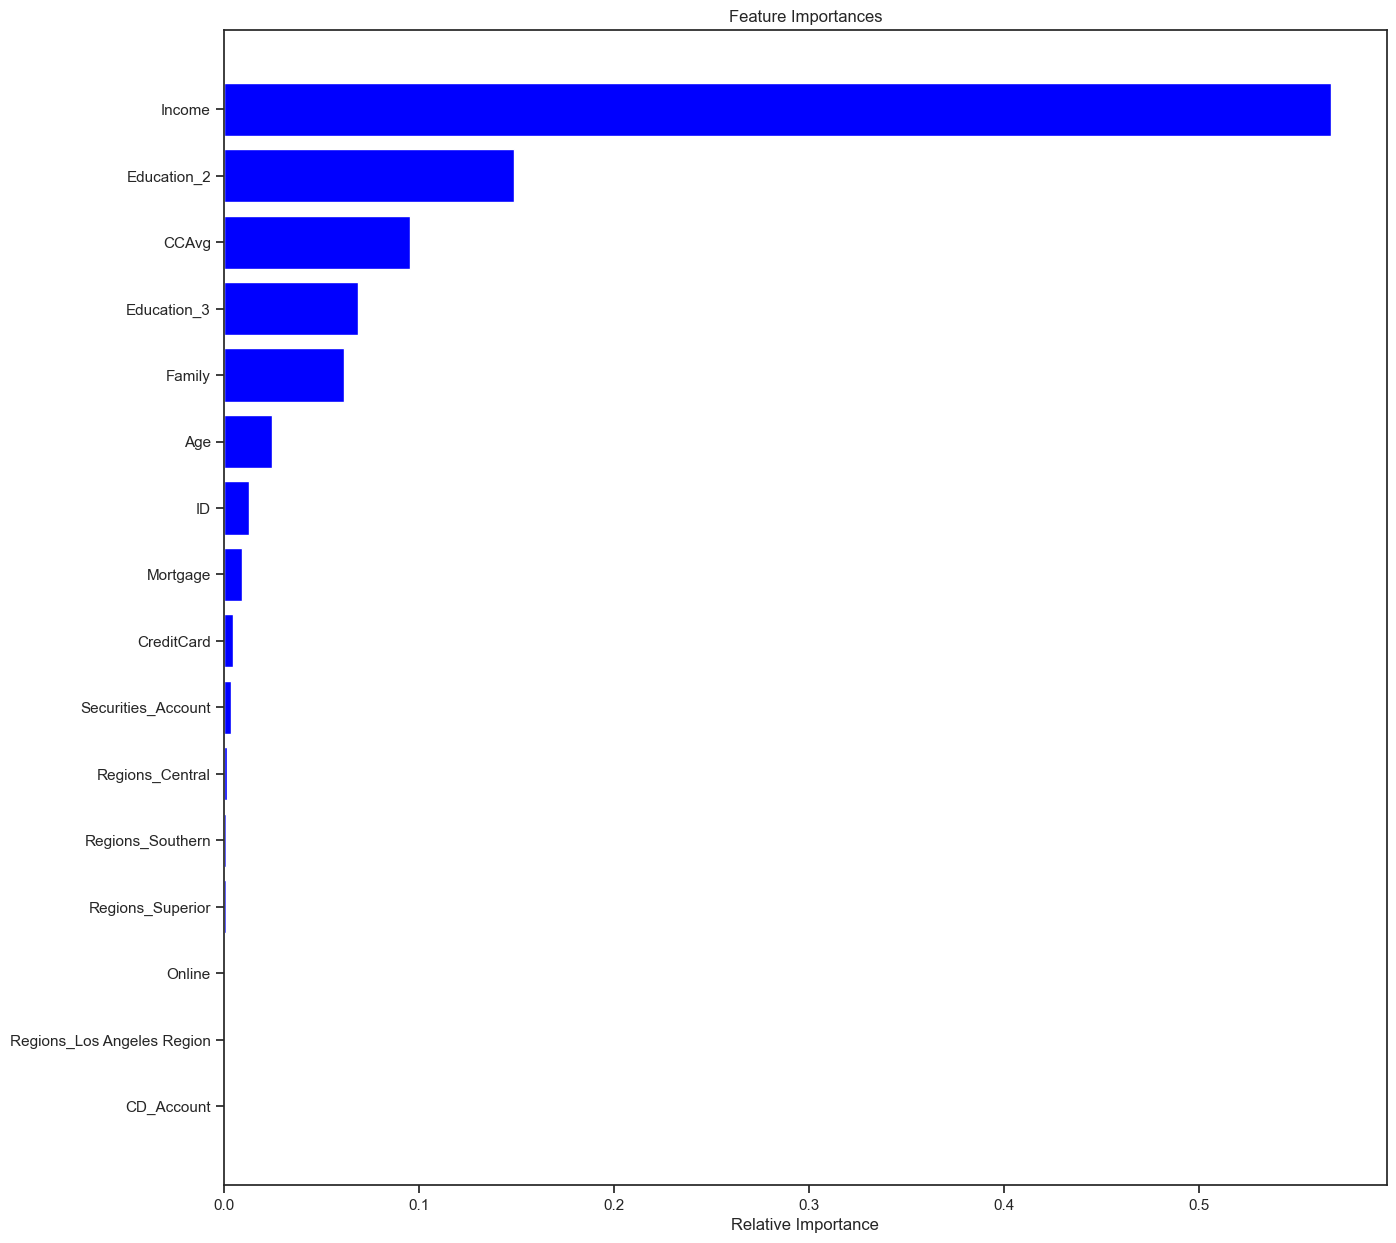

In [138]:
important = dtree_org.feature_importances_
indices = np.argsort(important)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Decision Tree Pre-Pruning with Hyperparameter Tuning**

In [139]:
estimator = DecisionTreeClassifier(random_state=1)


parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30, random_state=1)

In [140]:
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict_hp=estimator.predict(X_train_dt)
ytest_predict_hp=estimator.predict(X_test_dt)

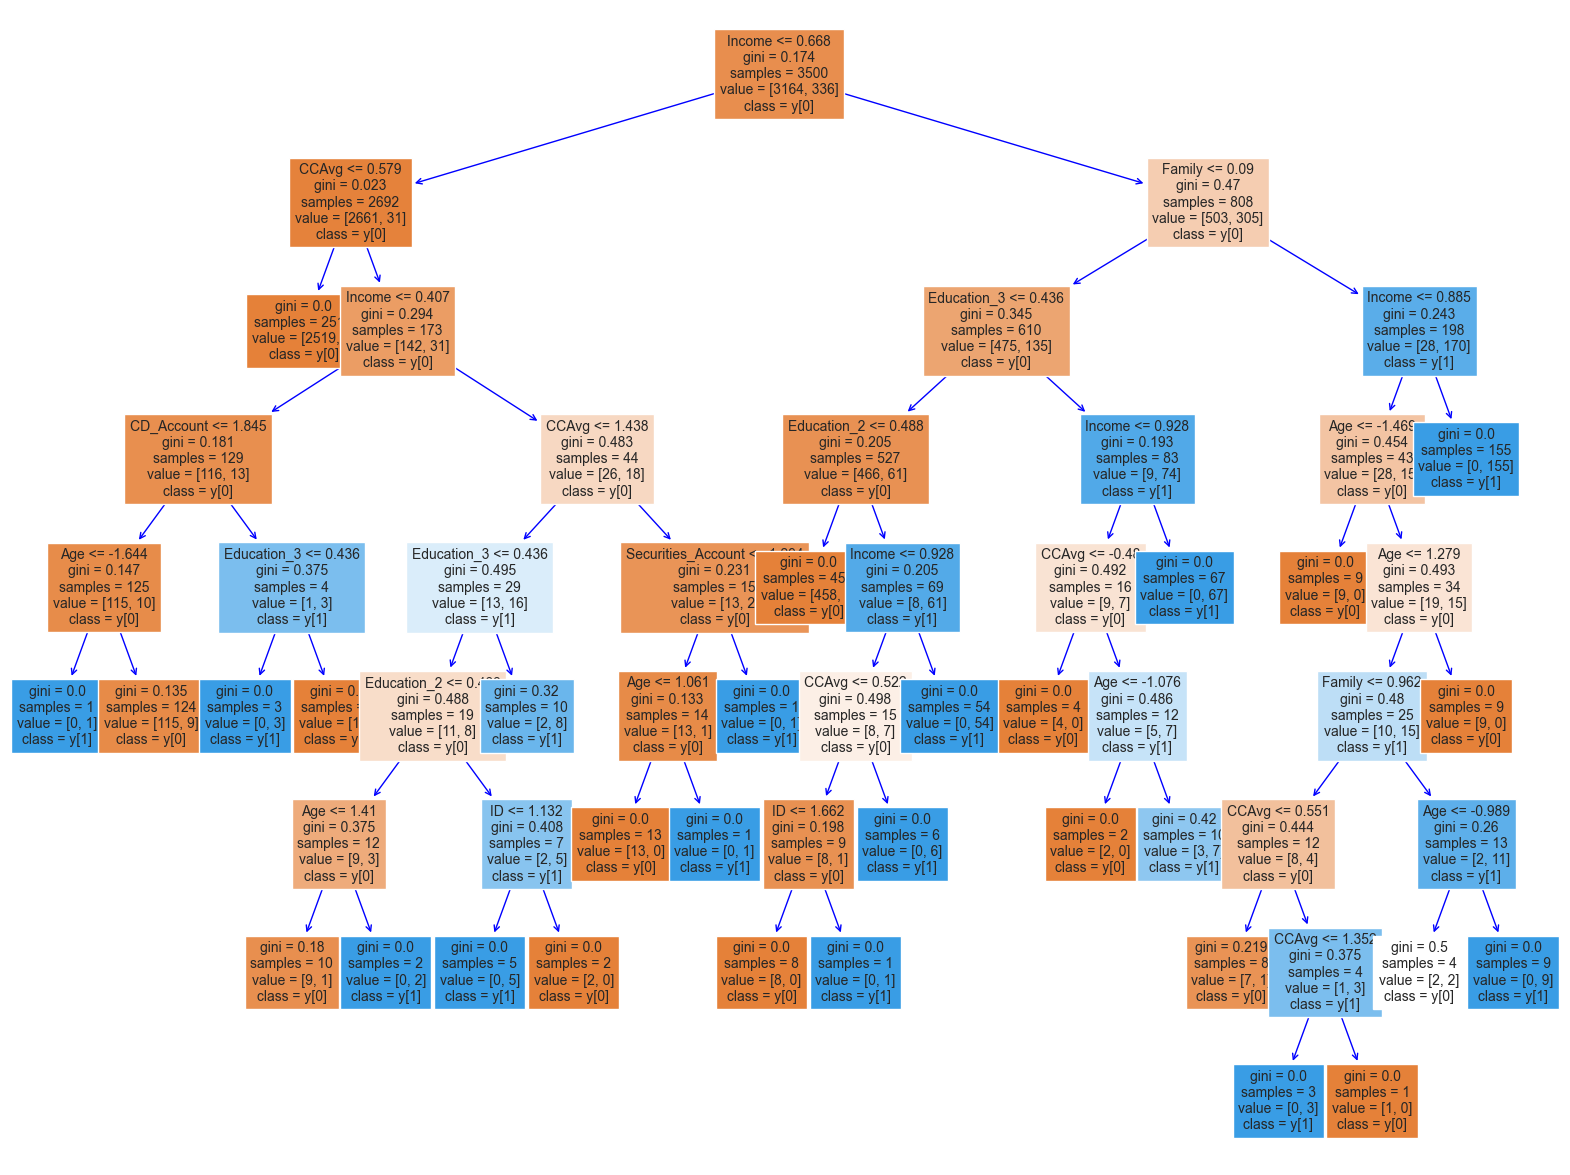

In [141]:
plt.figure(figsize=(20,15))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=10,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('blue')
        arrow.set_linewidth(1)
plt.show()

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.94      0.89      0.92       157

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Area under the curve:  0.9425091652399087


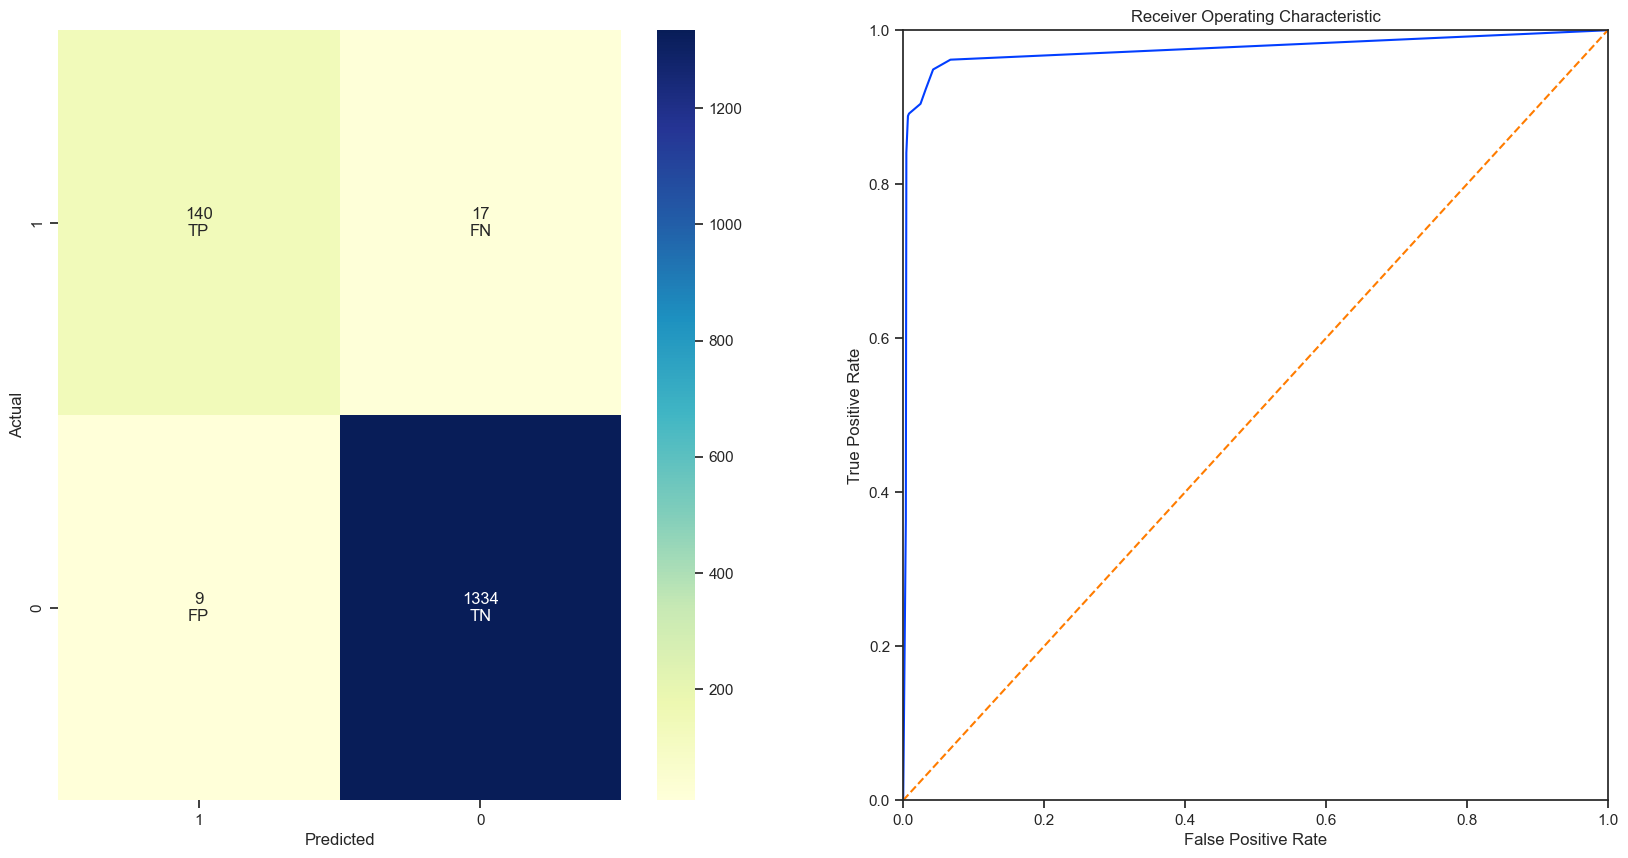

In [142]:
personal_loan_prediction("Decision Tree", estimator, train_X, test_X, train_y, test_y, plot=True)

In [143]:
result_tree_param_test=pd.DataFrame(data=[accuracy_score(test_y, ytest_predict_hp),
                                precision_score(test_y, ytest_predict_hp, average='macro'),
                                recall_score(test_y, ytest_predict_hp, average='macro'),
                                f1_score(test_y, ytest_predict_hp, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Pre-pruning hyperparameter tuning test results'])
result_tree_param_test

Pre-pruning hyperparameter tuning test results
Accuracy                                         0.822667
Precision                                        0.492077
Recall                                           0.493168
F1-score                                         0.492302

In [144]:
result_tree_param_train = pd.DataFrame(data=[accuracy_score(train_y, ytrain_predict_hp),
                                precision_score(train_y, ytrain_predict_hp, average='macro'),
                                recall_score(train_y, ytrain_predict_hp, average='macro'),
                                f1_score(train_y, ytrain_predict_hp, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Pre-pruning hyperparameter training test results'])
result_tree_param_train

Pre-pruning hyperparameter training test results
Accuracy                                           0.828857
Precision                                          0.492818
Recall                                             0.492719
F1-score                                           0.492766

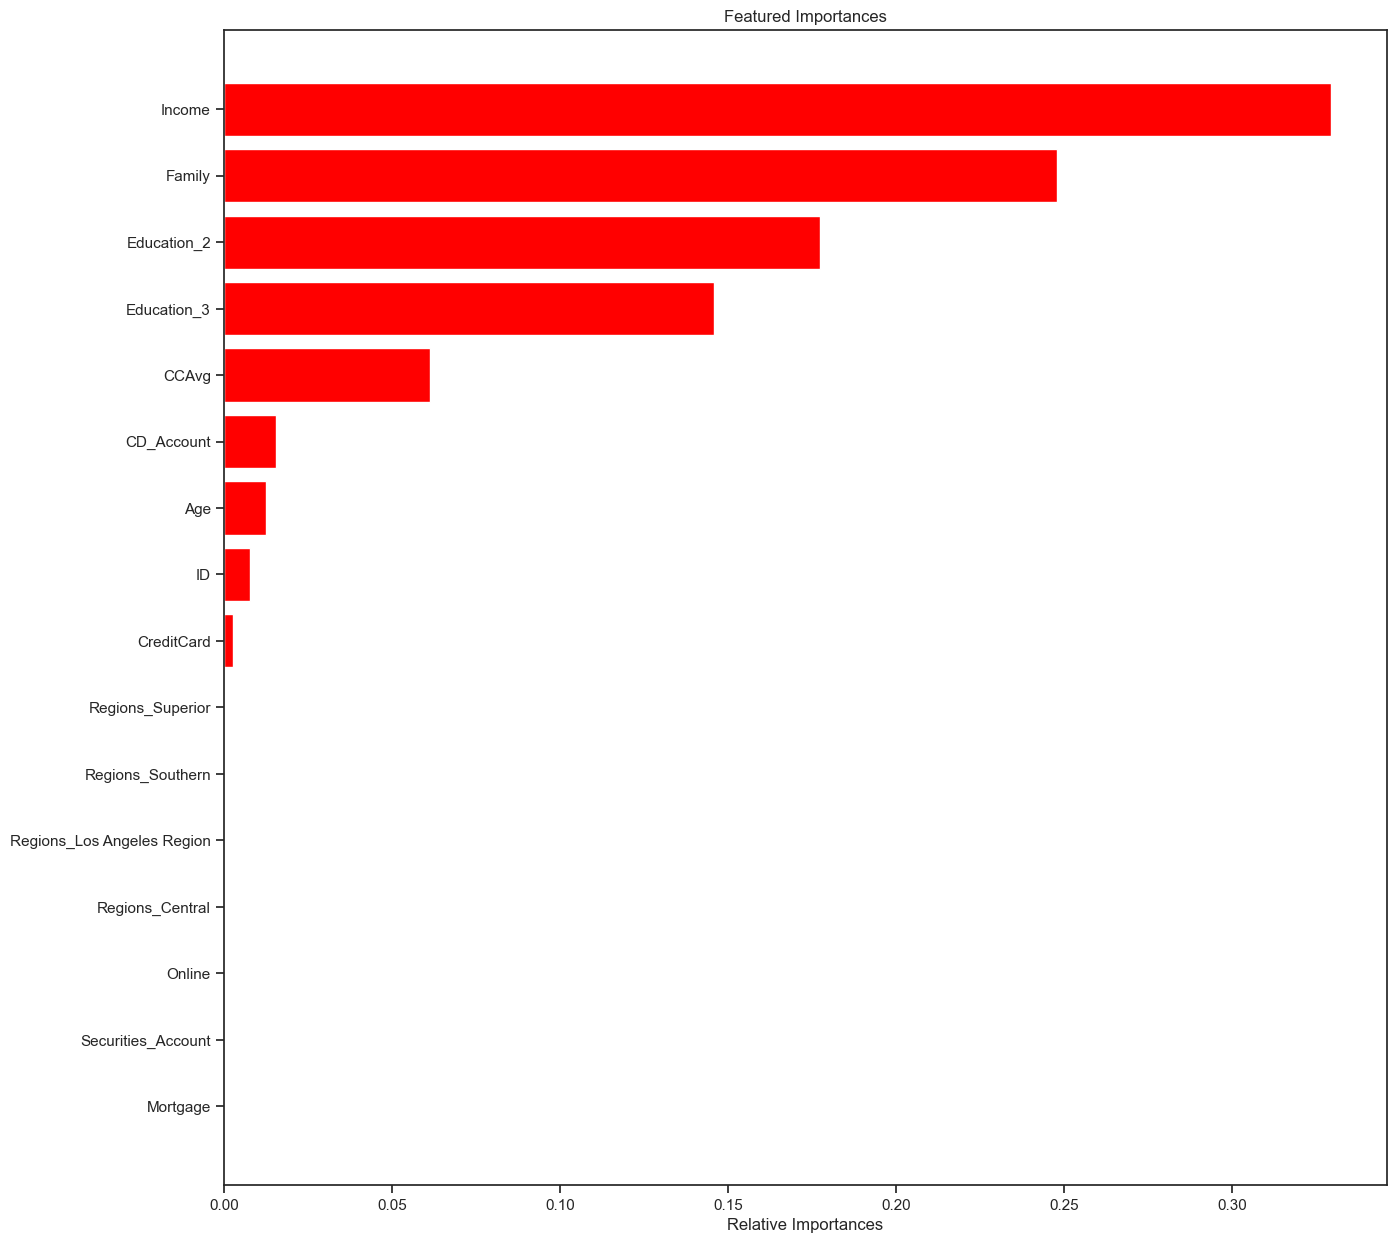

In [146]:
important = estimator.feature_importances_
indices = np.argsort(important)

plt.figure(figsize=(15,15))
plt.title('Featured Importances')
plt.barh(range(len(indices)), important[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

**Decision Tree Post Pruning**

In [147]:
post_pru_model = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
post_pru_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1343
           1       0.79      0.96      0.86       157

    accuracy                           0.97      1500
   macro avg       0.89      0.96      0.92      1500
weighted avg       0.97      0.97      0.97      1500

Area under the curve:  0.9628149736069547


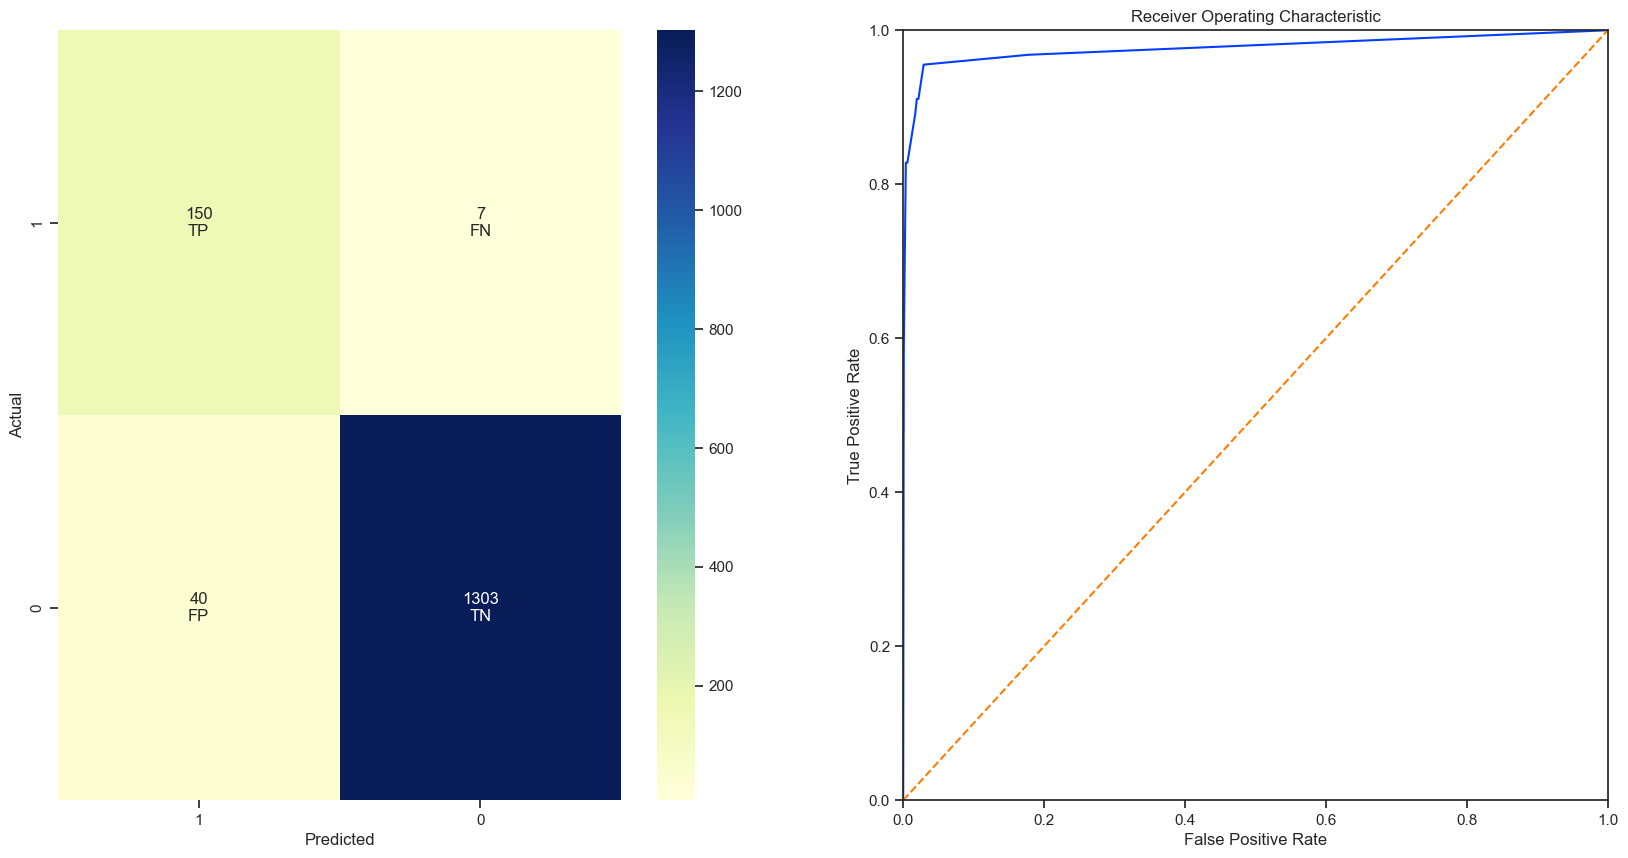

In [148]:
personal_loan_prediction("Decision Tree", post_pru_model, train_X, test_X, train_y, test_y, plot=True)

In [156]:
post_pru_model.fit(train_X, train_y)
y_test_pred_tree_postpru = post_pru_model.predict(test_X)
y_train_pred_tree_postpru = post_pru_model.predict(train_X)

result_tree_postpr_test=pd.DataFrame(data=[accuracy_score(test_y, y_test_pred_tree_postpru),
                                precision_score(test_y, y_test_pred_tree_postpru, average='macro'),
                                recall_score(test_y, y_test_pred_tree_postpru, average='macro'),
                                f1_score(test_y, y_test_pred_tree_postpru, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Post-pruning test dataset results'])
result_tree_postpr_test

Post-pruning test dataset results
Accuracy                            0.968667
Precision                           0.892065
Recall                              0.962815
F1-score                            0.923419

In [158]:
result_tree_postpru_train = pd.DataFrame(data=[accuracy_score(train_y, y_train_pred_tree_postpru),
                                precision_score(train_y, y_train_pred_tree_postpru, average='macro'),
                                recall_score(train_y, y_train_pred_tree_postpru, average='macro'),
                                f1_score(train_y, y_train_pred_tree_postpru, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = ['Post-pruning train test results'])
result_tree_postpru_train

Post-pruning train test results
Accuracy                          0.975429
Precision                         0.895416
Recall                            0.985075
F1-score                          0.934238

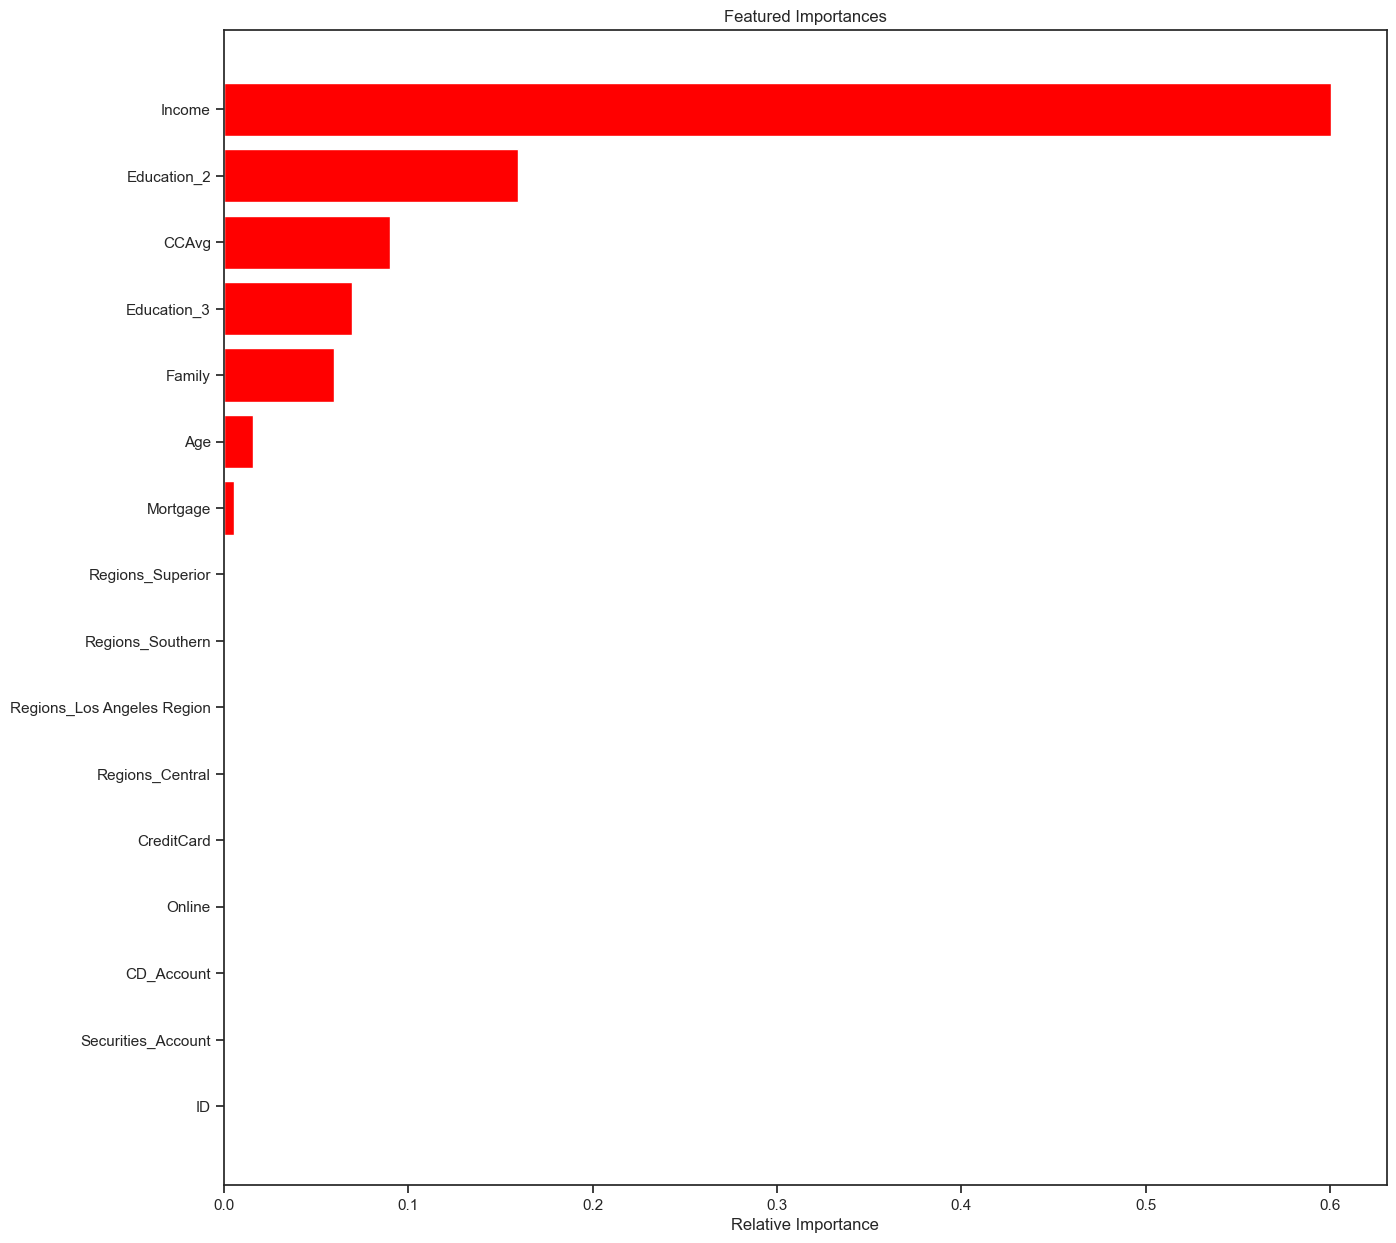

In [160]:
important = post_pru_model.feature_importances_
indices = np.argsort(important)

plt.figure(figsize=(15,15))
plt.title('Featured Importances')
plt.barh(range(len(indices)), important[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model Performance Improvement

At first, I started with a Logistic regression model but the model's recall was not efficient enough. Subsequently, I started with the decision tree model as the original model which I saw as overfitting to the original dataset. Afterwards, I started pre-pruning with HyperParameter Tuning which reduced overfitting, but did not improve the model's recall. Finally, I tested the model by post pruning with ccp_alpha and I was able to achieve favorable results as a result of the updated model's increased accuracy and recall. Important features of the updated post-pruning model are Income, Education 2, Education 3, Family, CCavg and Age.

## Model Comparison and Final Model Selection

In [162]:
compared_table = pd.DataFrame({'Model':['Logisitic Regression',
                                          'Initial decision tree model',
                                          'Decision tree pre-pruning with hyperparameter tuning',
                                          'Decision tree Post Pruning'
                                          ],
                                          'Train_accuracy':[0.96,1,0.83,0.98],
                                          'Test_accuracy':[0.96,0.97,0.82,0.97],
                                          'Train_Recall':[0.81,1,0.49,0.98],
                                          'Test_Recall':[0.83,0.93,0.49,0.96]})

compared_table

Model  Train_accuracy  \
0                               Logisitic Regression            0.96   
1                        Initial decision tree model            1.00   
2  Decision tree pre-pruning with hyperparameter ...            0.83   
3                         Decision Tree Post Pruning            0.98   

   Test_accuracy  Train_Recall  Test_Recall  
0           0.96          0.81         0.83  
1           0.97          1.00         0.93  
2           0.82          0.49         0.49  
3           0.97          0.98         0.96

## Actionable Insights and Business Recommendations


* What recommendations would you suggest to the bank?

- From the decision trees, we can surmise factors that are important in predicting whether customers will take loans or not. Factors such as income, family size, and education level all play a part in predicting whether customers will take loans from the bank.

- By analyzing the dataset, we can see that customers who typically have a higher income, larger family size, or higher educational levels are more likely to take out loans from the bank. 

- The model identifies customers who fall under such categories, which can help the bank create targeted marketing policies with plans made specifically for these customers. 

- With the use of this model, the bank can classify and identify customers based on a number of factors such as income and family size in order to create tailor-made offers for these customers with the idea of increasing the number of loans that the bank gives out. 